In [3]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import numpy as np
import scipy as sp
from scipy import stats
import seaborn as sns 

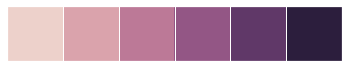

In [4]:
import seaborn as sns; sns.set()
sns.palplot(sns.cubehelix_palette())

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
# display data with first  rows and get the dimension of data. 
data  = pd.read_csv('ScreenAustralia_dataset.csv')
print (data.shape)
data.head()
data.head()
data_xx = data['Lifetime Gross']
print(data_xx[:10])
for i in range(len(data_xx)):
    if data_xx[i] < 10:
        print(i, data_xx[i])

(9304, 39)
0       7594
1       2197
2     165725
3     139792
4     111848
5      34535
6      16200
7       5011
8       2967
9    1184617
Name: Lifetime Gross, dtype: int64
16 8
3479 0
3735 0


In [7]:
#examine data exist rate (≠0%)

colnames=[]
existrate=[]
for i in data.columns:
  colnames.append(i)
  existrate.append(len(data[i].dropna())/len(data))

zipcolex=zip(colnames,existrate)
ces = sorted(zipcolex, key = lambda x: x[1],reverse=True)
for i in ces:
  a,b=i
  print("%s: %.2f%%"%(a,b*100))
    
# only keep 90%+, excl.

Title: 100.00%
Distributor: 100.00%
Release Date: 100.00%
Lifetime Gross: 100.00%
Opening Day: 100.00%
Country1: 99.94%
Genre1: 99.73%
Max Screens: 99.41%
Min Screens: 99.28%
Rating: 98.71%
Opening Week Gross: 97.54%
Lifetime multiple of Opening Week: 97.54%
Opening Weekend Screens: 97.37%
Opening Weekend Gross: 97.30%
Lifetime multiple of Opening Weekend: 97.30%
% of Opening Weekend to Week: 97.10%
Director1: 96.92%
Opening Week Screens: 96.14%
Actor1: 94.89%
Opening Day Gross: 93.98%
Opening Day Screens: 93.93%
Actor2: 88.61%
production_method: 75.56%
source: 74.53%
creative_type: 74.25%
sequel: 73.97%
running_time: 64.09%
Genre2: 63.54%
Actor3: 60.98%
production_budget: 33.90%
Genre3: 28.72%
Preview Gross: 24.18%
Country2: 23.99%
Country3: 7.55%
Opening Weekend Theatres: 7.41%
Opening Week Theatres: 7.31%
Opening Day Theatres: 7.23%
Director2: 4.66%
Director3: 0.54%


In [8]:
data.drop(['Genre3',
           'Title',
           'Country2',
           'Country3',
           'Director2',
           'Director3',
           'Actor2',
           'Actor3',
           'Opening Week Theatres','Opening Weekend Theatres','Opening Day Theatres',
           'Opening Day Gross','Opening Week Gross','Opening Weekend Gross',
           'Opening Day Screens','Opening Week Screens','Opening Weekend Screens',
           'Lifetime multiple of Opening Weekend','% of Opening Weekend to Week',
           'Max Screens','Min Screens'],axis=1, inplace=True)
           

In [9]:
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%d/%m/%Y')

In [10]:
# two films generated revenue on the opening day acrooding to the data from opening day gross
# Thus, there is no reason to have 0 on their lifetime gross. 
# We decided to remove them from the data set.
# data['Lifetime Gross'] = data.loc[data['Lifetime Gross'] != 0, 'Lifetime Gross']
y=data['Lifetime Gross']
print(y.describe().round(3))
#flling missing value with mean
data['Year'] = pd.DatetimeIndex(data['Release Date']).year

avg_fillna_fross=data.groupby("Year")['Year'].transform('mean')

y.fillna(avg_fillna_fross,inplace=True)
print("number of missing value:")
print(y.isna().sum())

count        9304.000
mean      2299626.877
std       5946923.527
min             0.000
25%         35494.250
50%        169878.500
75%       1402222.000
max     115781489.000
Name: Lifetime Gross, dtype: float64
number of missing value:
0


#EDA

change the data type from str to datetime

### Lifetime gross

In [11]:
def plot_dist(series):
    fig, ax= plt.subplots(figsize=(9,6))
    sns.distplot(series, ax=ax, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
        kde_kws={'color': 'black', 'alpha': 0.7})
    sns.despine()
    return fig, ax


def plot_dists(X, kde=True):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.distplot(X.iloc[:,i], ax=ax, kde=kde, hist_kws={'alpha': 0.9, 'edgecolor':'black'},  
                kde_kws={'color': 'black', 'alpha': 0.7})
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
            ax.set_yticks([])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

def plot_regressions(X, y, lowess=False):

    labels = list(X.columns)
    
    N, p = X.shape

    rows = int(np.ceil(p/3)) 

    fig, axes = plt.subplots(rows, 3, figsize=(12, rows*(12/4)))

    for i, ax in enumerate(fig.axes):
        if i < p:
            sns.regplot(X.iloc[:,i], y,  ci=None, y_jitter=0.05, 
                        scatter_kws={'s': 25, 'alpha':.8}, ax=ax, lowess=lowess)
            ax.set_xlabel('')
            ax.set_ylabel('')
            ax.set_title(labels[i])
        else:
            fig.delaxes(ax)

    sns.despine()
    plt.tight_layout()
    
    return fig, axes

In [12]:
y = data['Lifetime Gross']
print(y[3479])
y.head()

0


0      7594
1      2197
2    165725
3    139792
4    111848
Name: Lifetime Gross, dtype: int64

In [13]:
y.describe().round(3)

count        9304.000
mean      2299626.877
std       5946923.527
min             0.000
25%         35494.250
50%        169878.500
75%       1402222.000
max     115781489.000
Name: Lifetime Gross, dtype: float64

In [14]:
# data[y==0]
# based on the description above, there are some data exit 0 lifetime gross revenue

In [15]:
print(data.shape)
zero_index = data[(data['Lifetime Gross'] == 0)].index.tolist()
data.drop(index=zero_index, axis=0, inplace=True)
print(data.shape)
# based on the description above, there are some data exit 0 lifetime gross revenue

(9304, 19)
(9302, 19)


In [16]:
# These two films generated revenue on the opening day acrooding to the data from opening day gross
# Thus, there is no reason to have 0 on their lifetime gross. 
# We decided to remove them from the data set.
data['Lifetime Gross'] = data.loc[data['Lifetime Gross'] != 0, 'Lifetime Gross']
y=data['Lifetime Gross']

In [17]:
y.describe().round(3)

count        9302.000
mean      2300121.315
std       5947467.259
min             8.000
25%         35604.750
50%        170075.500
75%       1403402.000
max     115781489.000
Name: Lifetime Gross, dtype: float64

In [18]:
#flling missing value with mean
y.isna().sum()

0

In [19]:
data['Year'] = pd.DatetimeIndex(data['Release Date']).year

avg_fillna_fross=data.groupby("Year")['Year'].transform('mean')

y.fillna(avg_fillna_fross,inplace=True)
y.isnull().sum()

0

Skewness: 5.410860
Kurtosis: 46.605152


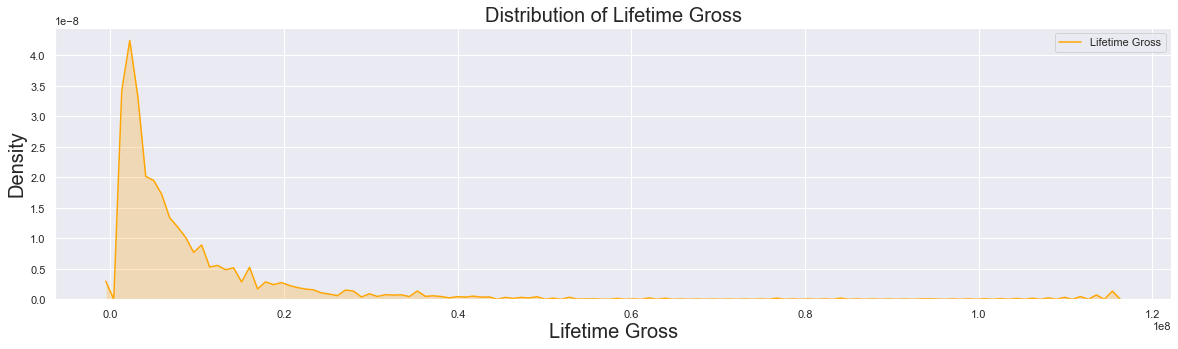

In [20]:
sns.set(rc={'figure.figsize':(20,5)})
dis_y=sns.kdeplot(y,shade=True,color='orange')

plt.title('Distribution of Lifetime Gross',fontdict={'size' :20})
plt.xlabel('Lifetime Gross',fontdict={'size' :20})
plt.ylabel('Density',fontdict={'size' :20})
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())
plt.savefig("Distribution of Lifetime Gross")
plt.show()

 heavy tail and extremely skewed, so do the log transformation

In [21]:
y_log = np.log(data['Lifetime Gross'])
data['log_LifetimeGross'] = y_log
data['log_LifetimeGross'].head().round(4)

0    8.935
1    7.695
2   12.018
3   11.848
4   11.625
Name: log_LifetimeGross, dtype: float64

In [22]:
data['log_LifetimeGross'].isnull().sum()

0

In [23]:
y_log.describe()

count   9302.000
mean      12.237
std        2.501
min        2.079
25%       10.480
50%       12.044
75%       14.154
max       18.567
Name: Lifetime Gross, dtype: float64

In [24]:
y_log.isnull().sum()

0

Skewness: -0.033758
Kurtosis: -0.440805


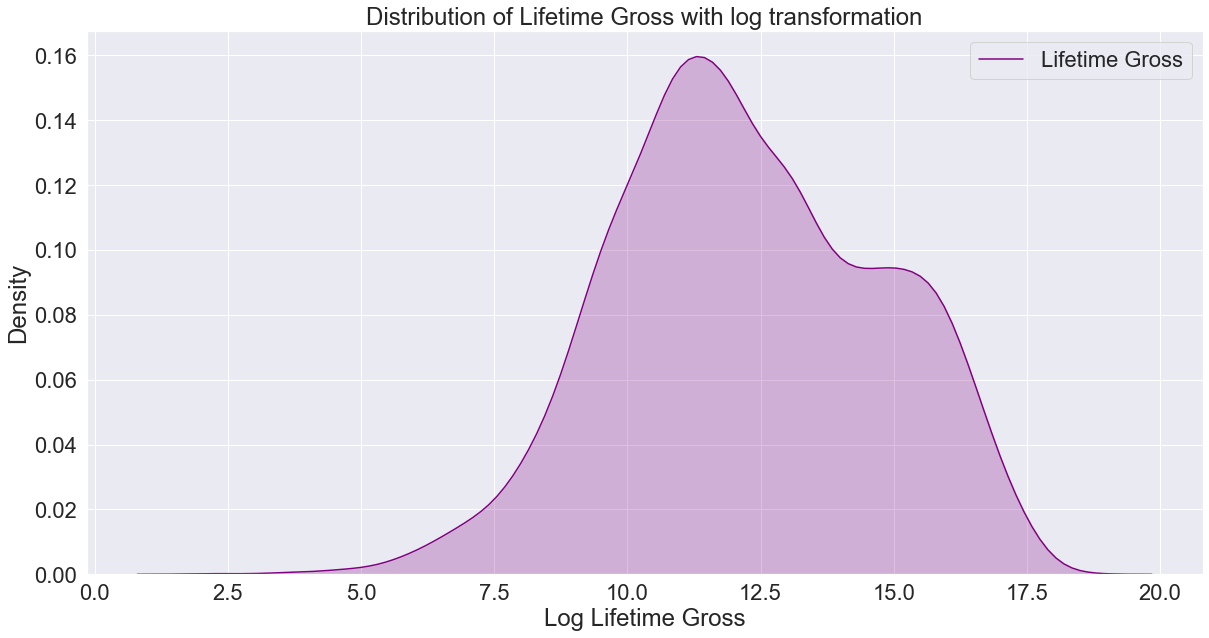

In [25]:
sns.set(rc={'figure.figsize':(20,10)},font_scale=2)
dis_logy = sns.kdeplot(y_log,shade=True,color='Purple')

plt.title('Distribution of Lifetime Gross with log transformation')
plt.xlabel('Log Lifetime Gross')
plt.ylabel('Density')
print("Skewness: %f" % y_log.skew())
print("Kurtosis: %f" % y_log.kurt())
plt.savefig("Distribution of Lifetime Gross with log transformation")
plt.show()

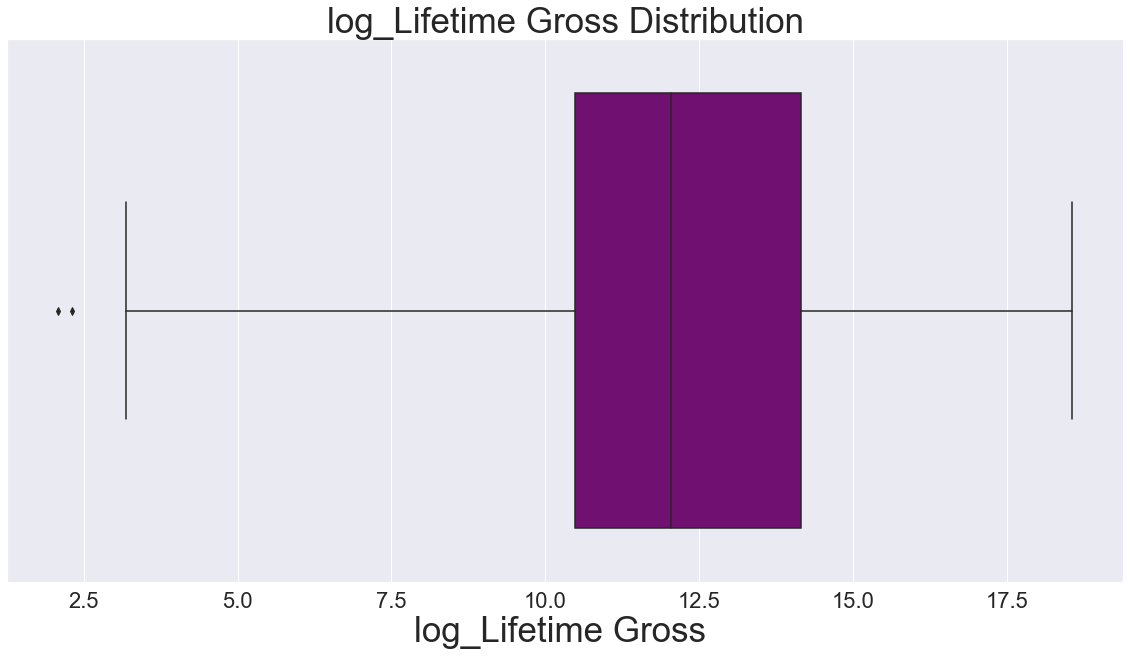

In [26]:
# using box plot to discover outliers better

sns.boxplot(y_log,whis=2,color='purple')
plt.xlabel('log_Lifetime Gross ',fontdict={'size' :35})
plt.title('log_Lifetime Gross Distribution',fontdict={'size' :35})

plt.savefig("Box plot of log_Lifetime Gross 1")

Explore data with average annual value, average quarter value and average month value.

In [27]:
data.iloc[data[data['log_LifetimeGross']<2.5].index]

,Distributor,Release Date,Rating,Genre1,Genre2,Country1,Director1,Actor1,Lifetime Gross,Preview Gross,Opening Day,Lifetime multiple of Opening Week,production_budget,creative_type,source,production_method,sequel,running_time,Year,log_LifetimeGross
16,Nanma International,2022-01-15,M,Thriller,NaN,India,Roshan Andrews,Diana Penty,8,NaN,Saturday,1.000,NaN,NaN,NaN,NaN,NaN,NaN,2022,2.079
293,Paramount,2021-07-01,NaN,Drama,Crime,USA,Quentin Tarantino,John Travolta,10,NaN,Thursday,NaN,8000000.000,Contemporary Fiction,Original Screenplay,Live Action,0.000,155.000,2021,2.303


In [28]:
m = y_log.median()
m

12.043997413017173

In [29]:
data.loc[data[data['log_LifetimeGross']<2.5].index, 'log_LifetimeGross'] = y_log.median()
y_log=data['log_LifetimeGross']
y_log.isnull().sum()

0

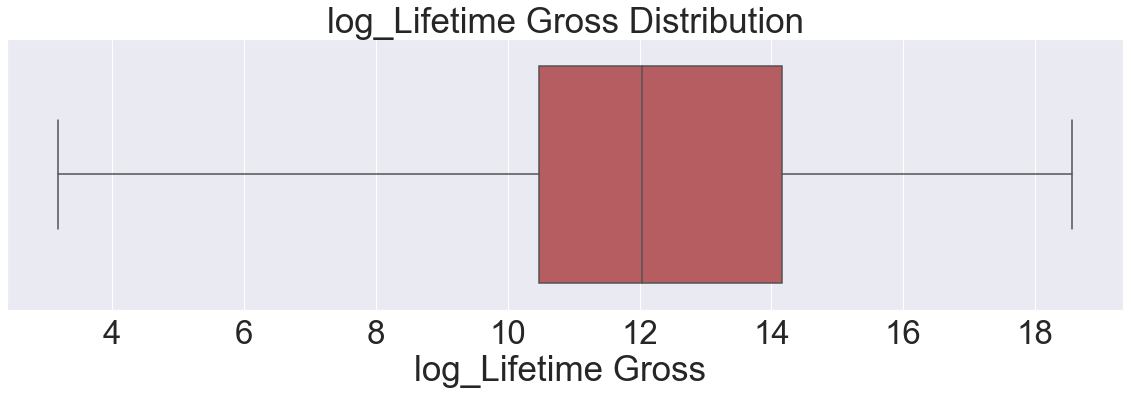

In [30]:
sns.set(rc={'figure.figsize':(20,5)},font_scale=3)
sns.boxplot(y_log,whis=2,color='r')
plt.xlabel('log_Lifetime Gross ',fontdict={'size' :35})
plt.title('log_Lifetime Gross Distribution',fontdict={'size' :35})
plt.savefig("Box plot of log_Lifetime Gross 2")

In [31]:
data['Year'] = pd.DatetimeIndex(data['Release Date']).year
annual_avg_lifetime=data.groupby(['Year'])['log_LifetimeGross'].mean()
annual_avg_lifetime

Year
2000   13.352
2001   13.351
2002   13.423
2003   13.342
2004   13.054
2005   12.912
2006   12.984
2007   13.019
2008   13.170
2009   12.838
2010   12.816
2011   12.877
2012   12.482
2013   12.526
2014   12.107
2015   12.018
2016   11.843
2017   11.561
2018   11.536
2019   11.205
2020   11.157
2021   11.130
2022   10.834
Name: log_LifetimeGross, dtype: float64

In [32]:
data['month'] = pd.DatetimeIndex(data['Release Date']).month
monthly_avg_lifetime=data.groupby(['month'])['log_LifetimeGross'].mean()
monthly_avg_lifetime

month
1    13.010
2    12.155
3    12.320
4    12.573
5    12.078
6    12.494
7    12.080
8    12.086
9    12.294
10   11.793
11   11.854
12   12.494
Name: log_LifetimeGross, dtype: float64

In [33]:
data['mon_yr'] = pd.to_datetime(data['Release Date']).dt.strftime('%Y/%m')
data['mon_yr'].sort_values().head()

9303    2000/01
9289    2000/01
9290    2000/01
9291    2000/01
9292    2000/01
Name: mon_yr, dtype: object

### Country

In [34]:

data['Country1'].isna().sum()

6

In [35]:
data['Country1'].fillna('Others',inplace=True)

In [36]:
data.loc[data['Country1'].isin(['Italy','Spain','Belgium','Germany','Norway','France','Netherlands','Romania',
          'Ireland','Iceland','Hungary','Denmark','Austria','Greece', 'Finland','Czech Republic',
         'Sweden','Poland','Bulgaria','Portugal','Macedonia','Serbia','Switzerland','Slovakia','Malta',
         'Estonia','UK']),'Country1'] = 'Europe'


data.loc[data['Country1'].isin(['India', 'Japan', 'China', 'Hong Kong', 'South Korea', 'Turkey', 'Philippines', 'Israel',
       'Bangladesh','Russia','Singapore','Thailand','Vietnam','Pakistan','Taiwan','Iran','Lebanon',
        'Malaysia','Palestine','Indonesia','Timor Leste','Saudi Arabia', 'Cambodia', 'Nepal',
       'Kazakhstan','Iraq','Bhutan','Afghanistan']),'Country1'] = 'Asia'

data.loc[data['Country1'].isin(['Mexico', 'Chile', 'Canada',
       'South Africa', 'New Zealand', 'Others', 'Brazil', 'Argentina',
       'Guatemala', 'Morocco', 'Colombia', 'Tunisia', 'Paraguay', 'Kenya',
       'Cuba', 'Peru', 'Tonga', 'Nigeria', 'Papua New Guinea',
       'Venezuela', 'Fiji', 'Senegal']),'Country1'] = 'Others'

In [37]:
data['Country1'].unique()

array(['Europe', 'Asia', 'USA', 'Others', 'Australia'], dtype=object)

In [38]:
data.rename(columns = {'Country1':'Country'}, inplace = True)

data.head()

,Distributor,Release Date,Rating,Genre1,Genre2,Country,Director1,Actor1,Lifetime Gross,Preview Gross,Opening Day,Lifetime multiple of Opening Week,production_budget,creative_type,source,production_method,sequel,running_time,Year,log_LifetimeGross,month,mon_yr
0,Palace,2022-01-29,EX,Opera,Live,Europe,Davide Livermore,Anna Netrebko,7594,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,8.935,1,2022/01
1,Southern Star,2022-01-28,NaN,Comedy,Romance,Asia,Nagesh Kuknoor,Keerthi Suresh,2197,NaN,Friday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,7.695,1,2022/01
2,Sony,2022-01-27,M,Drama,NaN,Europe,Pedro Almodovar,Rossy de Palma,165725,54997.000,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,12.018,1,2022/01
3,Nanma International,2022-01-27,M,Drama,Romance,Asia,Vineeth Sreenivasan,Kalyani Priyadarshan,139792,NaN,Thursday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,11.848,1,2022/01
4,Kismet,2022-01-27,PG,Comedy,Drama,USA,Michael Lembeck,Christopher Lloyd,111848,2802.000,Thursday,NaN,NaN,Contemporary Fiction,Original Screenplay,Live Action,0.000,100.000,2022,11.625,1,2022/01


In [39]:
#lifetime gross revenue from diff places and compare with au; +boxplot

aus=data[data['Country'] == 'Australia']
others=data[data['Country'] == 'Others']
eu=data[data['Country'] == 'Europe']
asia=data[data['Country'] == 'Asia']
usa=data[data['Country'] == 'USA']

print('Average Lifetime Gross of movie from worldwide is {:.2f}$.'.format(y.mean()))
print('Average Lifetime Gross of movie from Australia is {:.2f}$.'.format(aus['Lifetime Gross'].mean()))
print('Average Lifetime Gross of movie from others is {:.2f}$.'.format(others['Lifetime Gross'].mean()))
print('Average Lifetime Gross of movie from European countries is {:.2f}$.'.format(eu['Lifetime Gross'].mean()))
print('Average Lifetime Gross of movie from Asian countries is {:.2f}$.'.format(asia['Lifetime Gross'].mean()))
print('Average Lifetime Gross of movie from America is {:.2f}$.'.format(usa['Lifetime Gross'].mean()))


Average Lifetime Gross of movie from worldwide is 2300121.31$.
Average Lifetime Gross of movie from Australia is 1209761.41$.
Average Lifetime Gross of movie from others is 811946.86$.
Average Lifetime Gross of movie from European countries is 1068539.99$.
Average Lifetime Gross of movie from Asian countries is 187466.13$.
Average Lifetime Gross of movie from America is 4632859.08$.


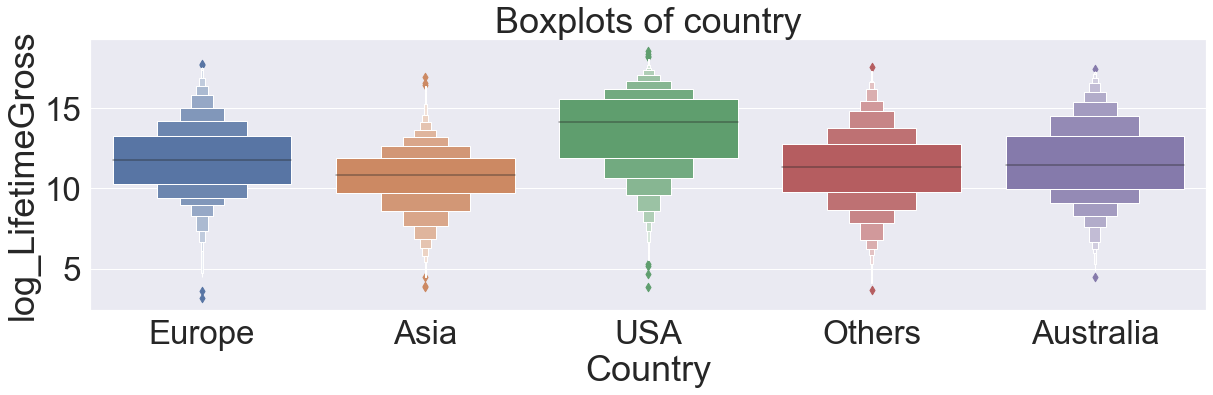

<Figure size 1440x360 with 0 Axes>

In [40]:
sns.set(font_scale=3)

bx_country = sns.boxenplot(x="Country", y="log_LifetimeGross", data=data)
plt.title('Boxplots of country')
plt.show()
plt.savefig("Boxplots of Country")

AttributeError: module 'seaborn' has no attribute 'move_legend'

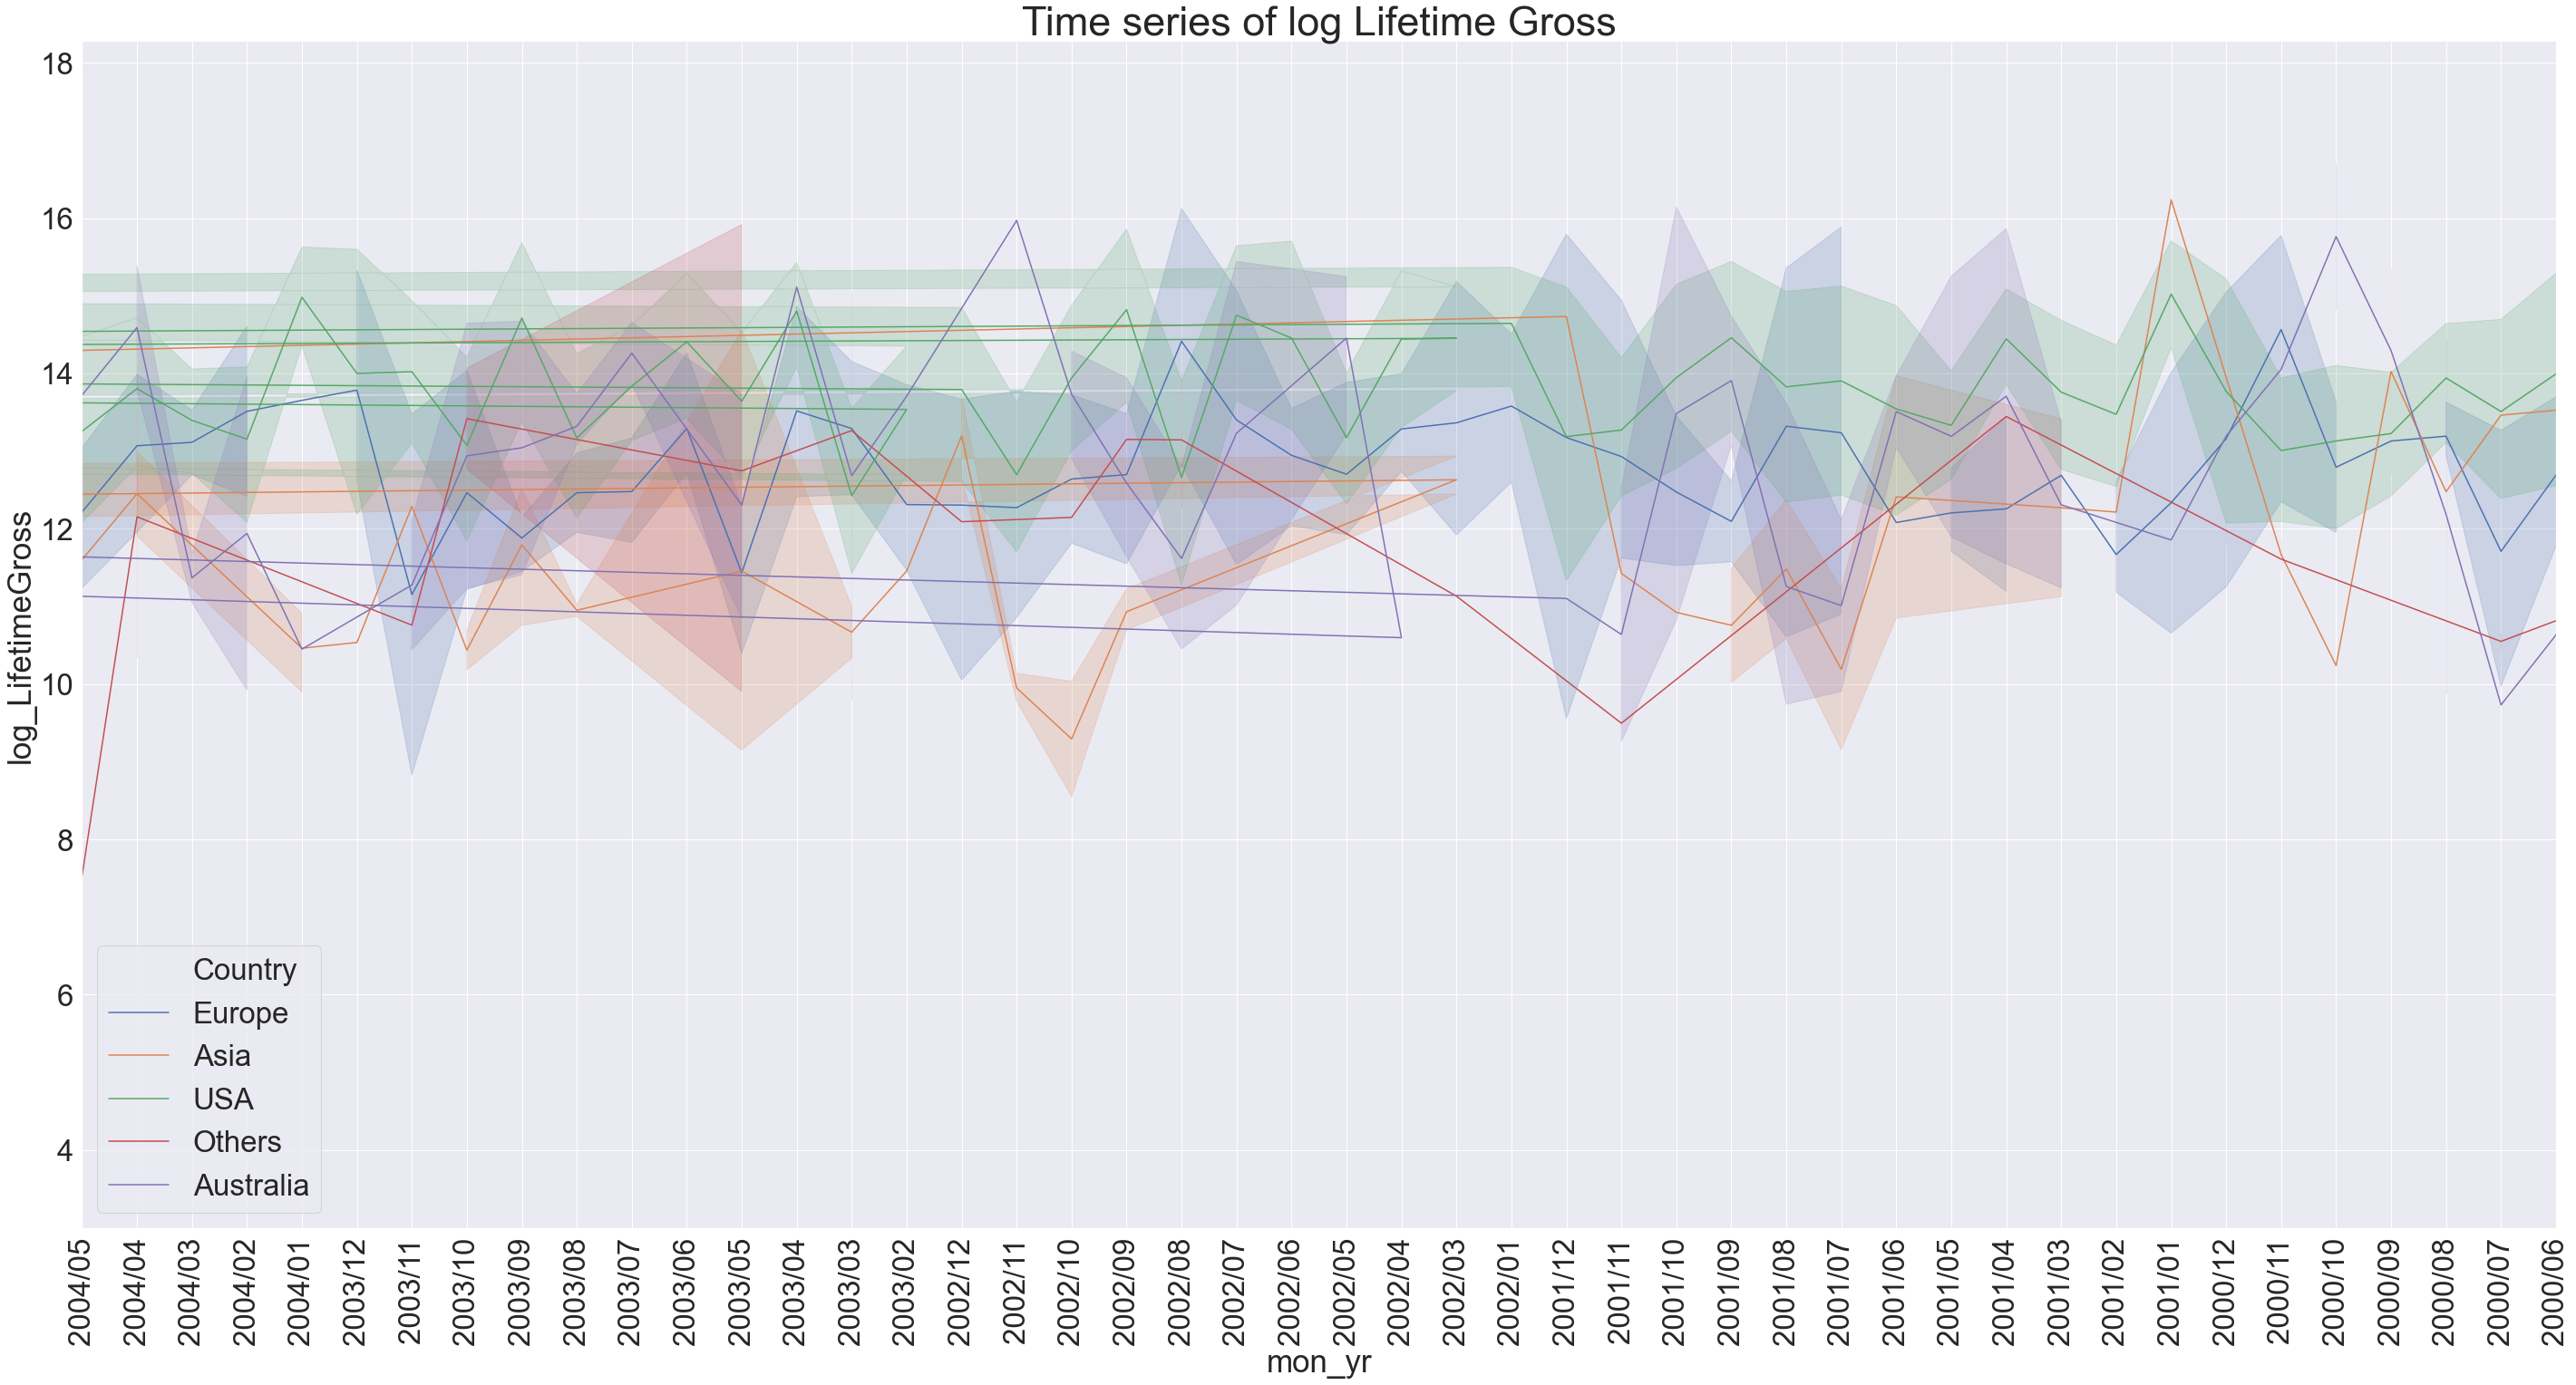

In [41]:
sns.set(rc={'figure.figsize':(40,20)},font_scale=3)
ts_mon_yr = data[['mon_yr','Country','log_LifetimeGross']]
plt.xlim(5, 50)
plt.tight_layout()
plt.ylabel('Lifetime Gross (log - Million$)',fontdict={'size' :35})
plt.xlabel('Release Date',fontdict={'size' :35})
plt.title('Time series of log Lifetime Gross',fontdict={'size' :45})
plt.xticks(rotation=90)
ts = sns.lineplot(data=ts_mon_yr,x='mon_yr',y='log_LifetimeGross',hue='Country')
ts.invert_xaxis()
sns.move_legend(
    ts, "lower center",
    bbox_to_anchor=(.5, .9), ncol=10, title=None, frameon=False,
)
plt.savefig("timeseries")

In [ ]:
import plotly.express as px

tempData = data[['mon_yr','Country','log_LifetimeGross','month','Year']]
tempData = tempData.groupby(['Year', 'Country']).mean()
tempData.reset_index(inplace=True)

plt.figure(figsize=(40,20))
plt.tight_layout()
px.line(tempData,title='Time Series of log_Lifetime Gross', x="Year", y="log_LifetimeGross",facet_col='Country',labels={"log_LifetimeGross":"Lifetime Gross (log - Million$)"})

<Figure size 2880x1440 with 0 Axes>

### distributor

In [42]:
data.drop(['Distributor'], axis=1, inplace=True)

### sequel

In [43]:
data['sequel_NaN'] = data['sequel'].isnull().astype(int)

data['sequel'].fillna(0,inplace=True)

print('missing value of sequel is {}'.format(data['sequel'].isnull().sum()))

missing value of sequel is 0


### running_time

In [44]:
data['running_time_NaN'] = data['running_time'].isnull().astype(int)

data['running_time'].fillna(0,inplace=True)

print('missing value of running_time is {}'.format(data['running_time'].isnull().sum()))

missing value of running_time is 0


## production_budget

In [45]:
data['production_budget'] = data['production_budget'] * 1.47

data['production_budget'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: production_budget, dtype: float64

In [46]:
data['production_budget_NaN'] = data['production_budget'].isnull().astype(int)

data['production_budget'].fillna(0,inplace=True)

print('missing value of production_budget is {}'.format(data['production_budget'].isnull().sum()))

missing value of production_budget is 0


In [47]:
data['production_budget'].describe()

count        9302.000
mean     23485548.285
std      54651623.426
min             0.000
25%             0.000
50%             0.000
75%      19110000.000
max     588000000.000
Name: production_budget, dtype: float64

## Rating


Re-define rating to three categories: Unrestricted, Restricted and Unclassified. Fill missing values with Unclassified.

In [48]:
# display the original categories in Rating
data['Rating'].value_counts(dropna=False)

M          3960
MA15+      2034
PG         1600
EX          824
G           504
R18+        177
NaN         120
TBC          69
VARIOUS      14
Name: Rating, dtype: int64

In [49]:
# put G, PG and M together and define as Unrestricted.

data.loc[data['Rating'] == 'G', 'Rating'] = 'Unrestricted'
data.loc[data['Rating'] == 'PG', 'Rating'] = 'Unrestricted'
data.loc[data['Rating'] == 'M', 'Rating'] = 'Unrestricted'

In [50]:
# put MA15+ and R18+ together and define as Restricted.
data.loc[data['Rating'] == 'MA15+', 'Rating'] = 'Restricted'
data.loc[data['Rating'] == 'R18+', 'Rating'] = 'Restricted'

In [51]:
# VARIOUS is not a offical word for rating
# display Rating with VARIOUS and investigate why rating as VARIOUS
various = data.loc[data['Rating'] == 'VARIOUS']


In [52]:
# classified as VARIOUS on rating is because it contains more than one film since most of them are movie festivals. 
# define the rest of classfications as Unclassfied.  
# fill missing values with Unclassified.

data.loc[data['Rating'] == 'TBC', 'Rating'] = 'Unclassified'
data.loc[data['Rating'] == 'EX', 'Rating'] = 'Unclassified'
data.loc[data['Rating'] == 'VARIOUS', 'Rating'] = 'Unclassified'

data['Rating'].fillna('Unclassified',inplace=True)

data['Rating'].value_counts(dropna=False)

Unrestricted    6064
Restricted      2211
Unclassified    1027
Name: Rating, dtype: int64

In [53]:
sns.axes_style({'axes.edgecolor':'black'})

{'axes.edgecolor': 'black'}

In [54]:
medians = data.groupby(['Rating'])['log_LifetimeGross'].median()
medians

Rating
Restricted     12.369
Unclassified    9.921
Unrestricted   12.429
Name: log_LifetimeGross, dtype: float64

In [55]:
data['Rating'].value_counts()


Unrestricted    6064
Restricted      2211
Unclassified    1027
Name: Rating, dtype: int64

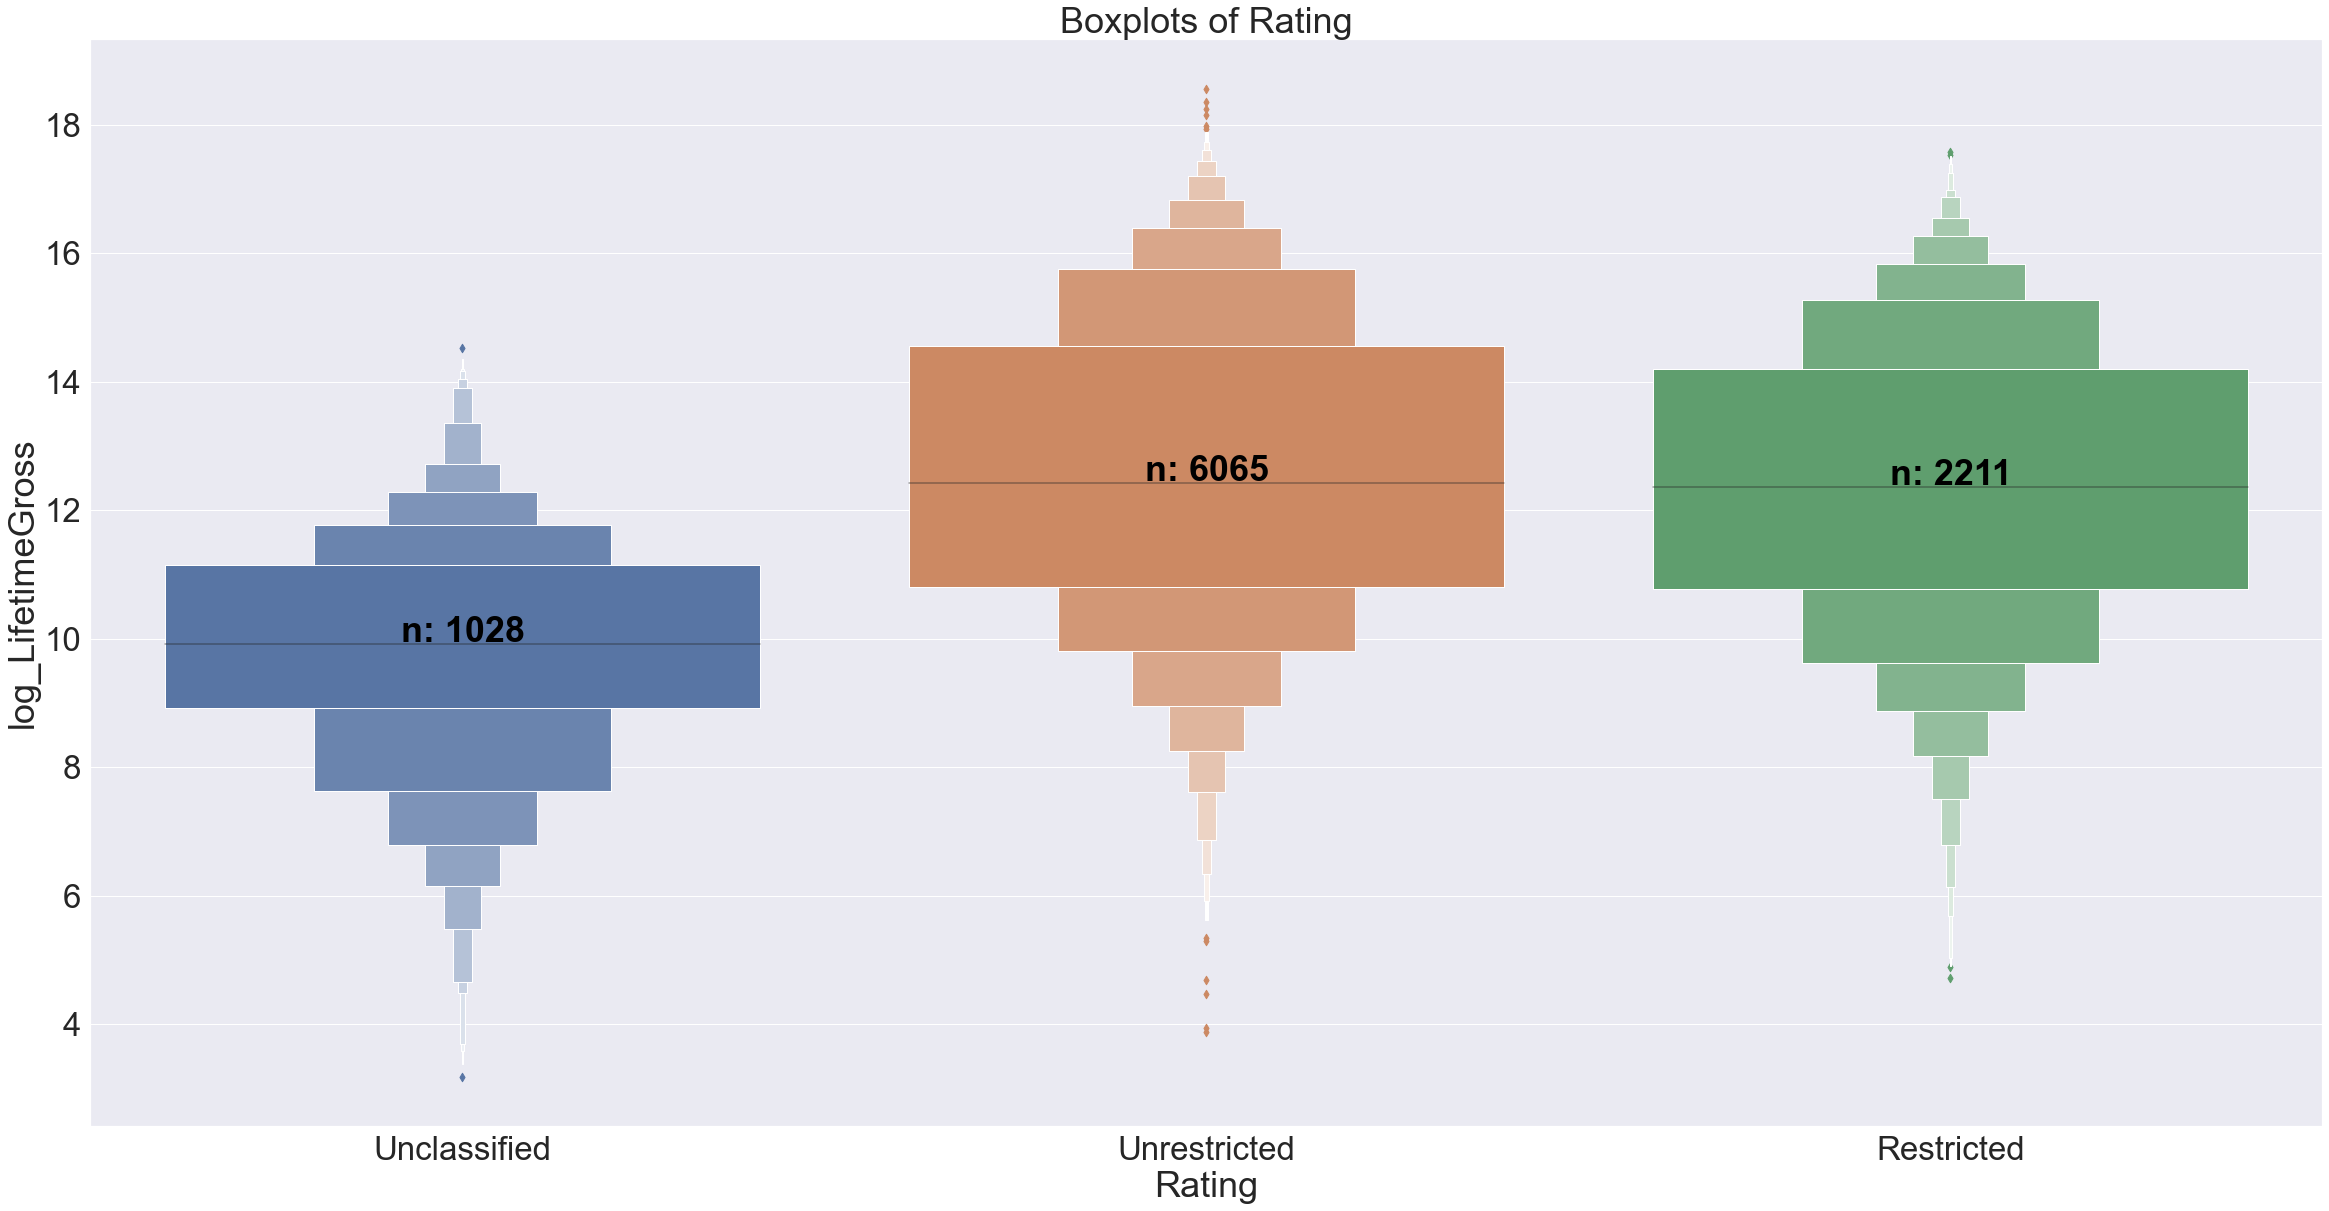

<Figure size 2880x1440 with 0 Axes>

In [56]:
bx_rating = sns.boxenplot(x="Rating", y="log_LifetimeGross", data=data)
plt.title('Boxplots of Rating')

# Calculate number of obs per group & median to position labels
medians = data.groupby(['Rating'])['log_LifetimeGross'].median().values
medians = [9.920, 12.428, 12.369]
numbers = [1028, 6065,2211]
nobs = ["n: " + str(x) for x in numbers]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,bx_rating.get_xticklabels()):
    bx_rating.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='medium',
            color='black',
            weight='semibold')
fontdict={'size' :20}
plt.show()
plt.savefig("Box plot of Rating")

## Genre1

fill missing value with 'Story'.

In [57]:
data['Genre1'].fillna('Story',inplace=True)

data['Genre1'].value_counts(dropna=False)

Drama              2657
Comedy             2093
Action             1613
Documentary         923
Adventure           502
Horror              256
Opera               238
Thriller            222
Play                105
Romance              82
Ballet               79
Romantic Comedy      73
Family               66
Animated             53
Concert              52
Live                 46
Suspense             45
Musical              40
Music                27
Story                25
Sci-fi               22
Biography            16
Fantasy              16
Sport                11
Black Comedy         10
Crime                 8
Dance                 7
Western               6
Mystery               3
History               3
War                   2
Political             1
Name: Genre1, dtype: int64

In [58]:
genre_c = data['Genre1'].value_counts(dropna=False)

keep_genre = genre_c.index[:15].tolist()
genre_list = genre_c.index[:].tolist()

for i in genre_list:
    if i not in keep_genre:
        data.loc[data['Genre1'] == i, 'Genre1'] = 'Others'

data['Genre1'].value_counts(dropna=False)

Drama              2657
Comedy             2093
Action             1613
Documentary         923
Adventure           502
Others              288
Horror              256
Opera               238
Thriller            222
Play                105
Romance              82
Ballet               79
Romantic Comedy      73
Family               66
Animated             53
Concert              52
Name: Genre1, dtype: int64

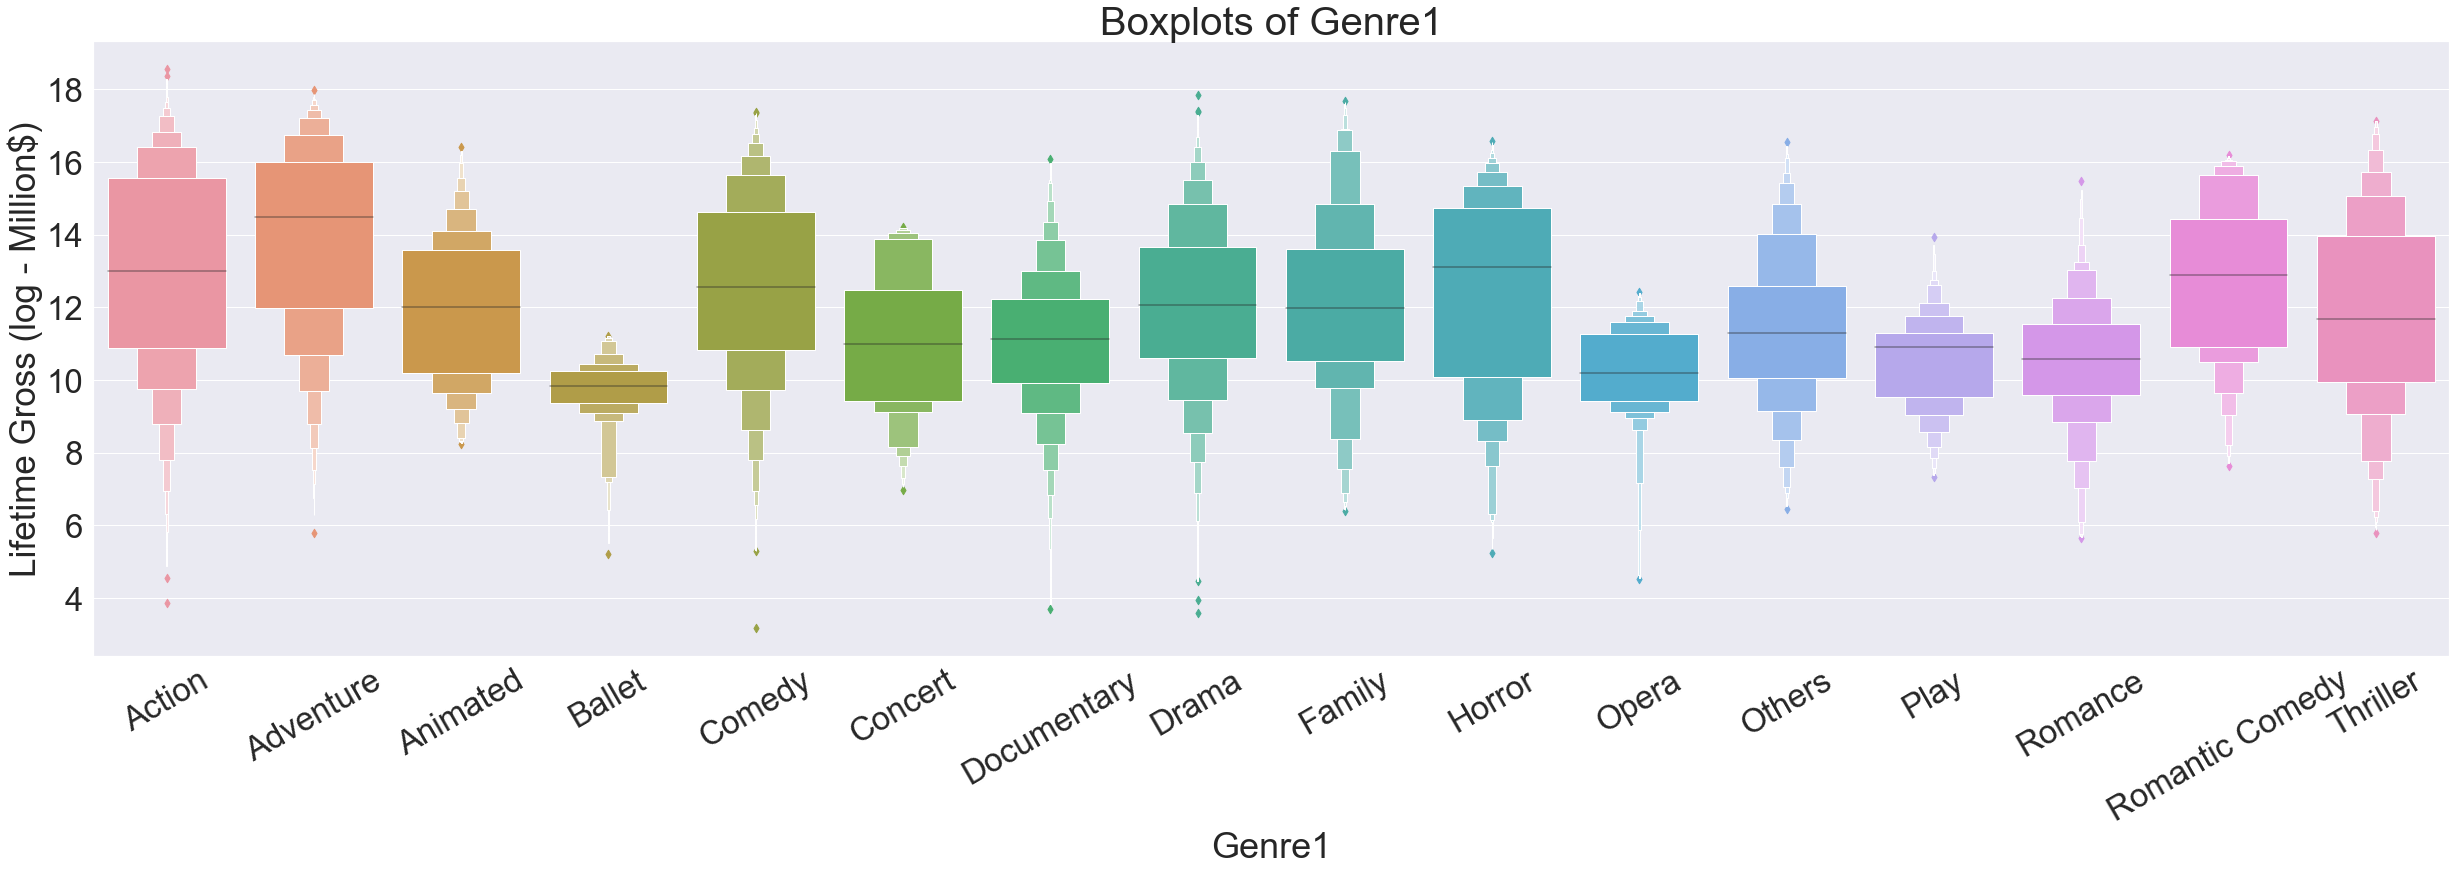

In [59]:
myList = data['Genre1'].unique()
myList.sort()
sns.set(rc={'figure.figsize':(35,13)},font_scale=3)
bx_genre1 = sns.boxenplot(x="Genre1", y="log_LifetimeGross", data=data, order=myList)
plt.xticks(rotation=30)
plt.title('Boxplots of Genre1',fontdict={'size' :40})
plt.ylabel('Lifetime Gross (log - Million$)',fontdict={'size' :35})
plt.tight_layout()
plt.savefig("Box plot of Genre 1")

## Genre2 

create dummy variable for existence of missing value missing value exists = 1; if it doesn‘t = 0

In [60]:
data['Genre2'].isnull().sum()

3391

In [61]:
# create dummy variable for existence of missing value 
# missing value exists = 1; if it doesnt = 0

data['Genre2_NaN'] = data['Genre2'].isnull().astype(int)

data['Genre2_NaN'].head()

0    0
1    0
2    1
3    0
4    0
Name: Genre2_NaN, dtype: int32

In [62]:
genre_c = data['Genre2'].value_counts(dropna=False)

keep_genre = genre_c.index[:15].tolist()
genre_list = genre_c.index[:].tolist()

for i in genre_list:
    if i not in keep_genre:
        data.loc[data['Genre2'] == i, 'Genre2'] = 'Others'

data['Genre2'].value_counts(dropna=False)

NaN          3391
Drama        1280
Thriller      706
Romance       604
Others        538
Adventure     469
Comedy        459
Live          393
Biography     293
Crime         224
Family        223
Horror        186
Music         146
Sci-fi        134
Musical       130
Animated      126
Name: Genre2, dtype: int64

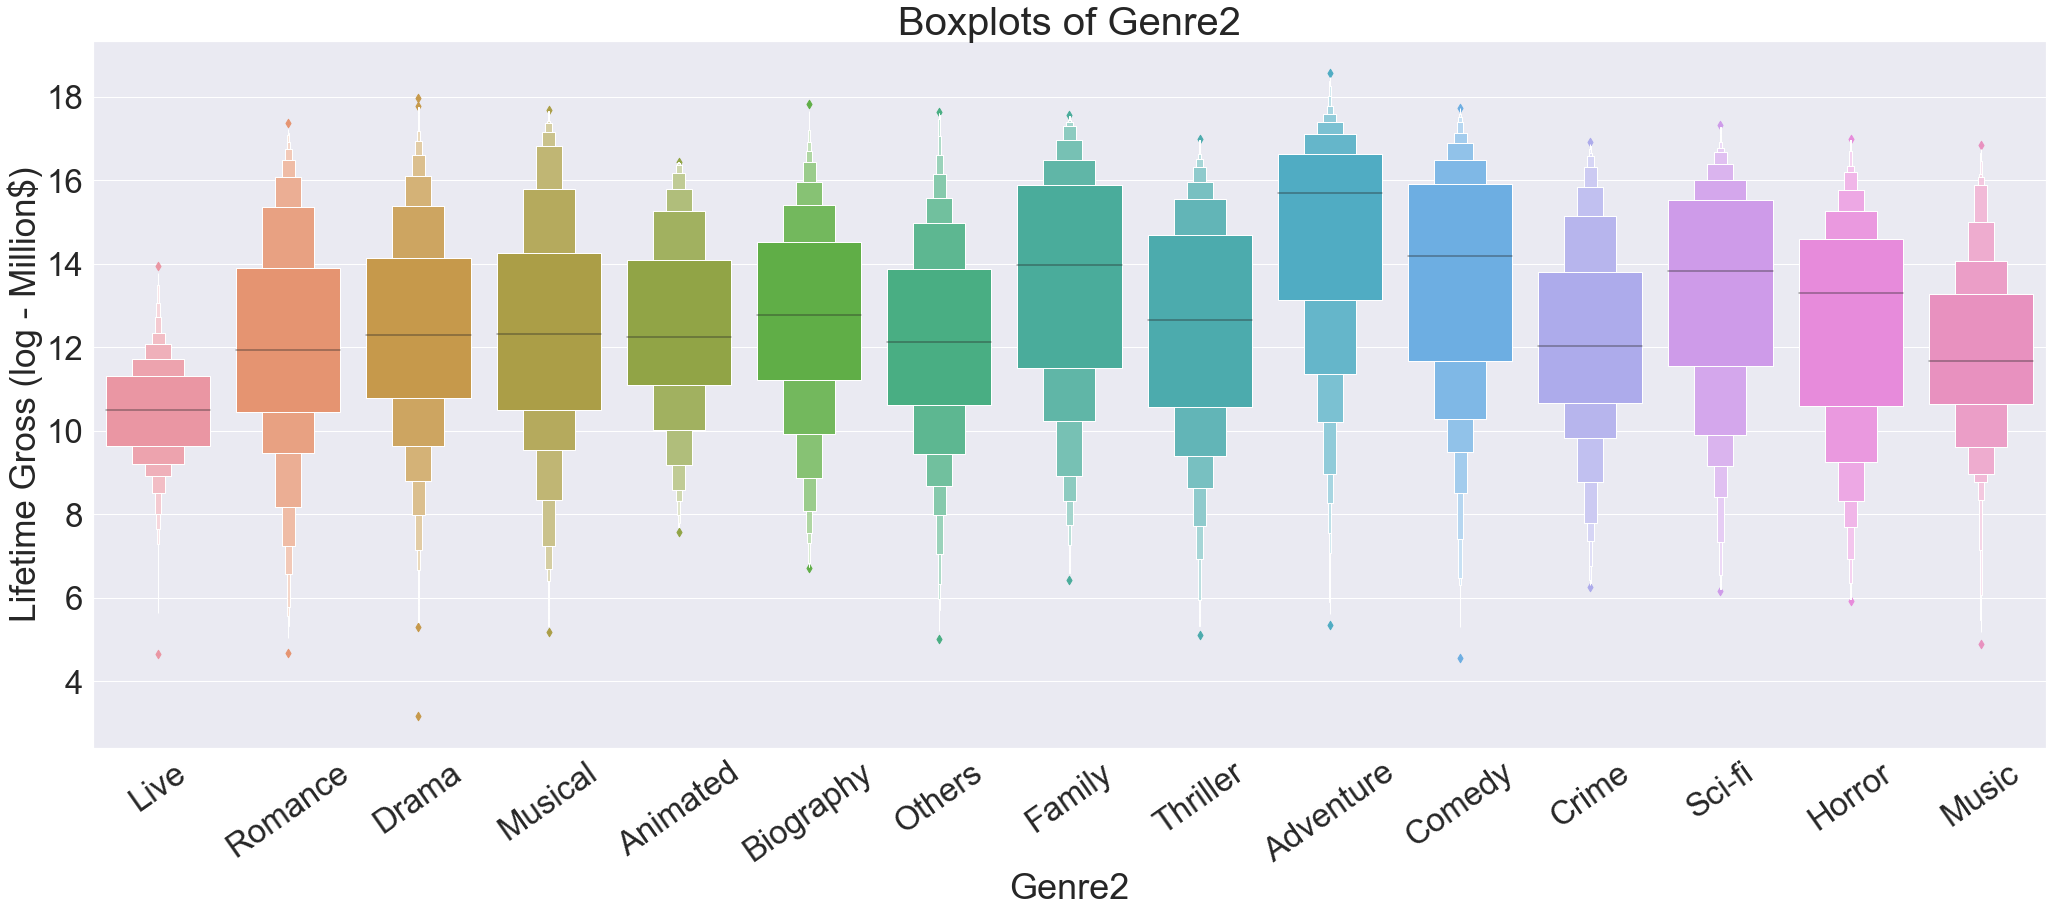

In [63]:
bx_genre2 = sns.boxenplot(x="Genre2", y="log_LifetimeGross", data=data)
plt.xticks(rotation=35)
plt.ylabel('Lifetime Gross (log - Million$)',fontdict={'size' :35})
plt.title('Boxplots of Genre2',fontdict={'size' :40})

plt.savefig("Box plot of Genre 2")

plt.savefig("Box plot of Genre 2")

In [64]:
data['Genre2_NaN'].value_counts()

0    5911
1    3391
Name: Genre2_NaN, dtype: int64

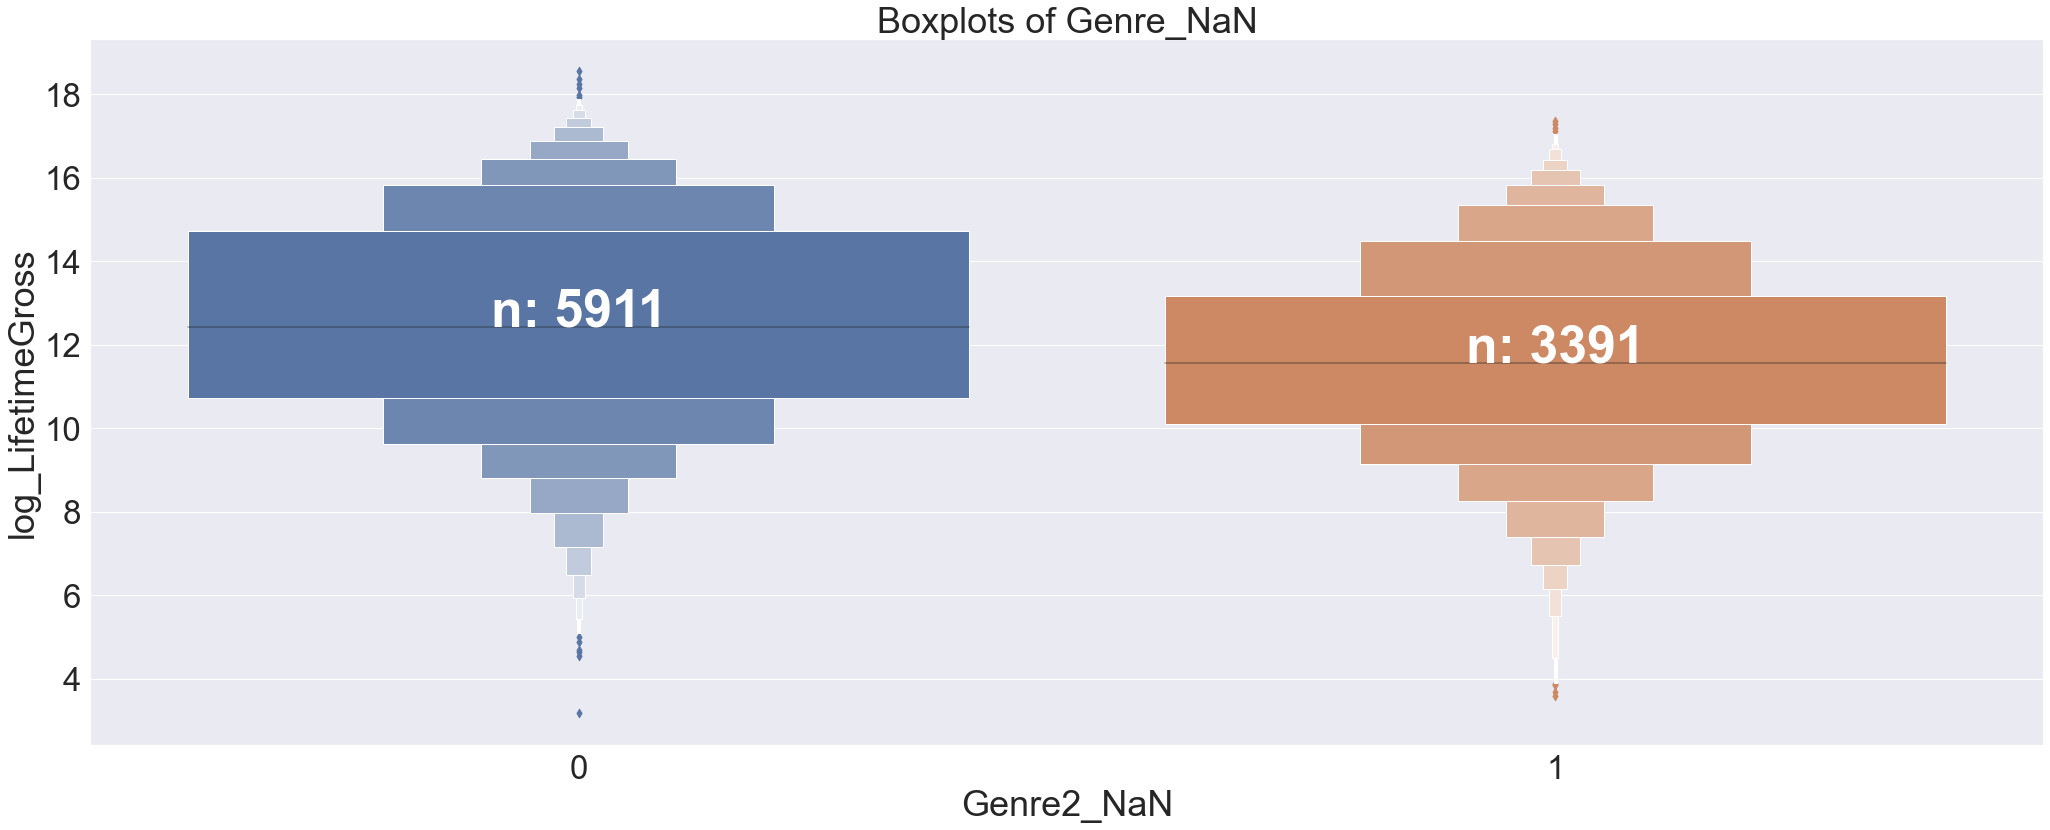

<Figure size 2520x936 with 0 Axes>

In [65]:
bx_genrenan = sns.boxenplot(x="Genre2_NaN", y="log_LifetimeGross", data=data)
plt.title('Boxplots of Genre_NaN')



medians = data.groupby(['Genre2_NaN'])['log_LifetimeGross'].median().values
nobs = data['Genre2_NaN'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot
pos = range(len(nobs))
for tick,label in zip(pos,bx_genrenan.get_xticklabels()):
    bx_genrenan.text(pos[tick],
            medians[tick] + 0.03,
            nobs[tick],
            horizontalalignment='center',
            size='x-large',
            color='w',
            weight='semibold')
fontdict={'size' :25} 
plt.show()
plt.savefig("Box plot of Genre_NaN")

TypeError: Cannot cast DatetimeArray to dtype float64

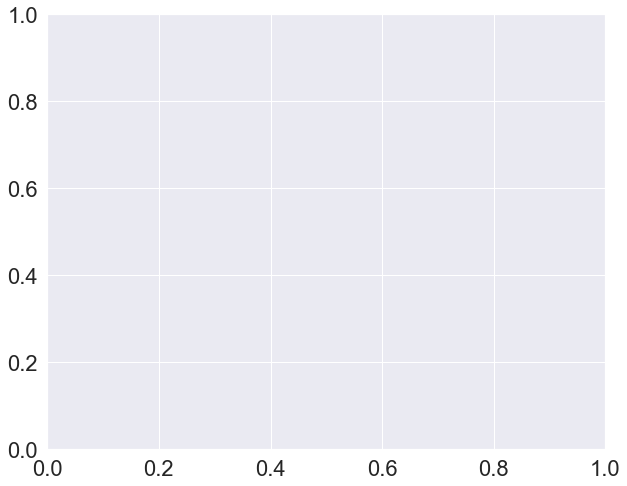

In [66]:
sns.set(rc={'figure.figsize':(10,8)},font_scale=2)
sns.kdeplot(data=data, x="Genre2_NaN", y="log_LifetimeGross",fill=True,color='b')
plt.savefig("Kedplot of Genre2_NaN")

## Director
Only keep Director1 and fill missing values with Unknown.

In [67]:
data['Director1'].isna().sum()

286

In [68]:
data['Director1'].fillna('Others',inplace=True)

director_c = data['Director1'].value_counts(dropna=False)

#only consider the directors that directed more than 11 movies 
keep_director = director_c.index[:28].tolist()
director_list = director_c.index[:].tolist()

for i in director_list:
    if i not in keep_director:
        data.loc[data['Director1'] == i, 'Director1'] = 'Others'

data['Director1'].value_counts(dropna=False)


Others                  8929
Steven Soderbergh         20
Steven Spielberg          19
Phil Grabsky              19
Ridley Scott              18
Clint Eastwood            18
Michael Winterbottom      18
Woody Allen               16
Nicholas Hytner           16
Priyadarshan              15
Ron Howard                14
Richard Linklater         14
Peter Jackson             13
Francois Ozon             13
Martin Scorsese           13
Danny Boyle               13
Tim Burton                12
Shawn Levy                12
Rohit Shetty              12
Christopher Nolan         11
Pedro Almodovar           11
Robert Zemeckis           11
Dennis Dugan              11
Lasse Hallstrom           11
M. Night Shyamalan        11
Robert Rodriguez          11
Stephen Frears            11
Kriv Stenders             10
Name: Director1, dtype: int64

In [69]:
data_copy = data.copy()
data_copy.loc[data_copy['Director1'].isin(['Michael Winterbottom','Woody Allen','Nicholas Hytner','Priyadarshan','Steven Soderbergh','Steven Spielberg','Phil Grabsky','Ridley Scott','Clint Eastwood', ]),'Director1'] = 'high'

data_copy.loc[data_copy['Director1'].isin(['Ron Howard','Richard Linklater','Peter Jackson','Francois Ozon','Martin Scorsese','Danny Boyle',
         'Tim Burton','Shawn Levy','Rohit Shetty','Christopher Nolan','Pedro Almodovar','Dennis Dugan','Lasse Hallstrom','Kenneth Branagh','M. Night Shyamalan','Robert Rodriguez','Antoine Fuqua','Max Bervy','Stephen Frears','Ken Loach','Robert Zemeckis','Kriv Stenders','Roger Michell','Cathy Garcia-molina']),'Director1'] = 'average'

In [70]:
data_copy.head()

,Release Date,Rating,Genre1,Genre2,Country,Director1,Actor1,Lifetime Gross,Preview Gross,Opening Day,Lifetime multiple of Opening Week,production_budget,creative_type,source,production_method,sequel,running_time,Year,log_LifetimeGross,month,mon_yr,sequel_NaN,running_time_NaN,production_budget_NaN,Genre2_NaN
0,2022-01-29,Unclassified,Opera,Live,Europe,Others,Anna Netrebko,7594,NaN,Saturday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,8.935,1,2022/01,1,1,1,0
1,2022-01-28,Unclassified,Comedy,Romance,Asia,Others,Keerthi Suresh,2197,NaN,Friday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,7.695,1,2022/01,1,1,1,0
2,2022-01-27,Unrestricted,Drama,NaN,Europe,average,Rossy de Palma,165725,54997.000,Thursday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,12.018,1,2022/01,1,1,1,1
3,2022-01-27,Unrestricted,Drama,Romance,Asia,Others,Kalyani Priyadarshan,139792,NaN,Thursday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,11.848,1,2022/01,1,1,1,0
4,2022-01-27,Unrestricted,Comedy,Drama,USA,Others,Christopher Lloyd,111848,2802.000,Thursday,NaN,0.000,Contemporary Fiction,Original Screenplay,Live Action,0.000,100.000,2022,11.625,1,2022/01,0,0,1,0


TypeError: Cannot cast DatetimeArray to dtype float64

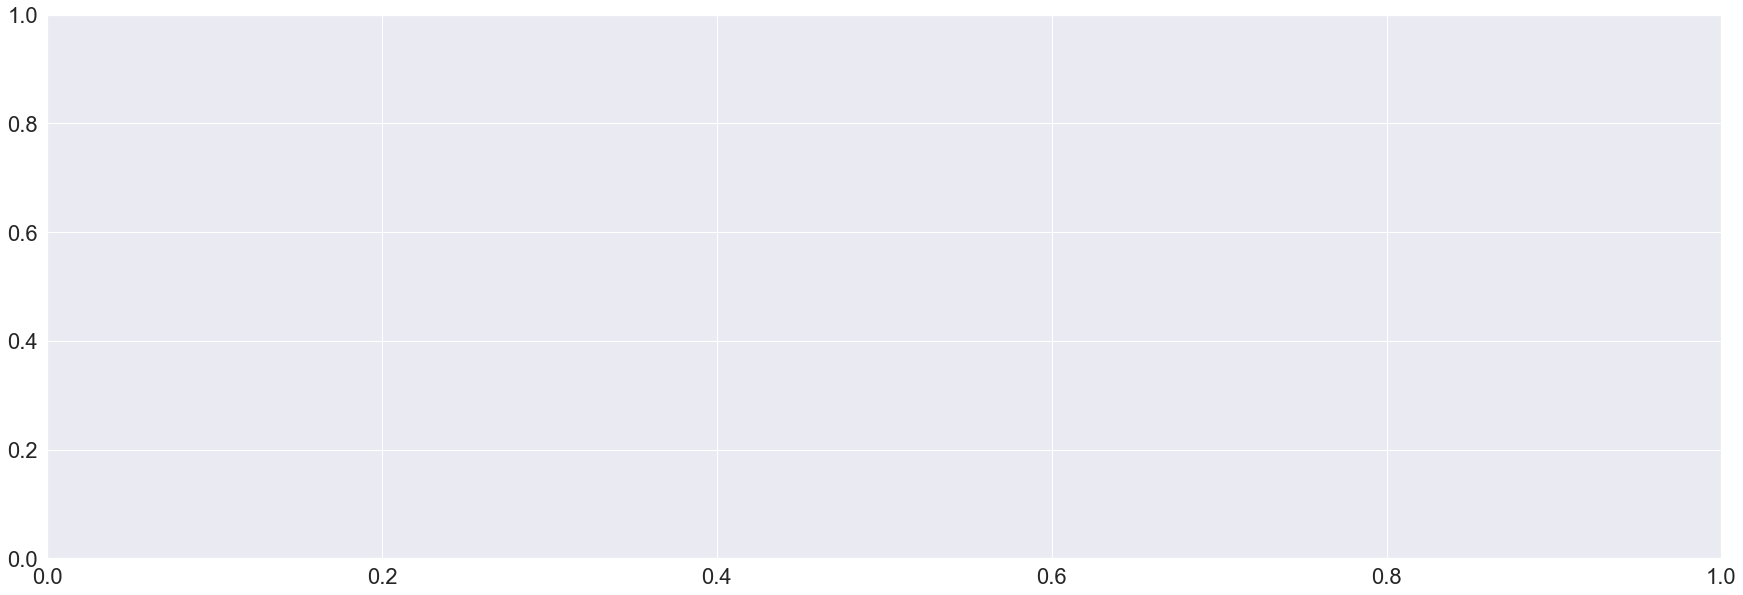

In [71]:
plt.subplots(figsize = (30,10))
sns.kdeplot(
   data=data_copy, x="log_LifetimeGross", hue="Director1",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Distribution of Director',fontdict={'size' :40})
plt.savefig("Distribution of Director")
plt.show()

## Actor
Only keep Actor1 and fill missing values with Unknown.



In [72]:
data['Actor1'].isna().sum()

474

In [73]:
data['Actor1'].fillna('Others',inplace=True)

Actor_c = data['Actor1'].value_counts(dropna=False)

In [74]:
#keep more than 20
keep_Actor = Actor_c.index[:17].tolist()
Actor_list = Actor_c.index[:].tolist()

for i in Actor_list:
    if i not in keep_Actor:
        data.loc[data['Actor1'] == i, 'Actor1'] = 'Others'

data['Actor1'].value_counts(dropna=False)

Others              8893
Akshay Kumar          43
Amitabh Bachchan      34
Salman Khan           29
Matt Damon            28
Johnny Depp           27
Nicole Kidman         26
Adam Sandler          26
Tom Hanks             24
Ryan Reynolds         23
Bruce Willis          23
Ewan McGregor         22
Mark Wahlberg         22
Liam Neeson           21
Tom Cruise            21
Jackie Chan           20
George Clooney        20
Name: Actor1, dtype: int64

In [75]:
data_copy['Actor1'].fillna('Others',inplace=True)

Actor_c = data_copy['Actor1'].value_counts(dropna=False)
keep_Actor = Actor_c.index[:17].tolist()
Actor_list = Actor_c.index[:].tolist()

for i in Actor_list:
    if i not in keep_Actor:
        data_copy.loc[data_copy['Actor1'] == i, 'Actor1'] = 'Others'

data_copy['Actor1'].value_counts(dropna=False)

Others              8893
Akshay Kumar          43
Amitabh Bachchan      34
Salman Khan           29
Matt Damon            28
Johnny Depp           27
Nicole Kidman         26
Adam Sandler          26
Tom Hanks             24
Ryan Reynolds         23
Bruce Willis          23
Ewan McGregor         22
Mark Wahlberg         22
Liam Neeson           21
Tom Cruise            21
Jackie Chan           20
George Clooney        20
Name: Actor1, dtype: int64

In [76]:
data_copy
data_copy.loc[data_copy['Actor1'].isin(['Akshay Kumar','Amitabh Bachchan','Salman Khan','Matt Damon','Johnny Depp','Nicole Kidman',
         'Adam Sandler']),'Actor1'] = 'high'

data_copy.loc[data_copy['Actor1'].isin(['Tom Hanks','Ryan Reynolds','Bruce Willis','Ewan McGregor','Mark Wahlberg','Liam Neeson',
         'Tom Cruise','Jackie Chan','George Clooney']),'Actor1'] = 'average'



In [77]:
data_copy.head()

,Release Date,Rating,Genre1,Genre2,Country,Director1,Actor1,Lifetime Gross,Preview Gross,Opening Day,Lifetime multiple of Opening Week,production_budget,creative_type,source,production_method,sequel,running_time,Year,log_LifetimeGross,month,mon_yr,sequel_NaN,running_time_NaN,production_budget_NaN,Genre2_NaN
0,2022-01-29,Unclassified,Opera,Live,Europe,Others,Others,7594,NaN,Saturday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,8.935,1,2022/01,1,1,1,0
1,2022-01-28,Unclassified,Comedy,Romance,Asia,Others,Others,2197,NaN,Friday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,7.695,1,2022/01,1,1,1,0
2,2022-01-27,Unrestricted,Drama,NaN,Europe,average,Others,165725,54997.000,Thursday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,12.018,1,2022/01,1,1,1,1
3,2022-01-27,Unrestricted,Drama,Romance,Asia,Others,Others,139792,NaN,Thursday,NaN,0.000,NaN,NaN,NaN,0.000,0.000,2022,11.848,1,2022/01,1,1,1,0
4,2022-01-27,Unrestricted,Comedy,Drama,USA,Others,Others,111848,2802.000,Thursday,NaN,0.000,Contemporary Fiction,Original Screenplay,Live Action,0.000,100.000,2022,11.625,1,2022/01,0,0,1,0


TypeError: Cannot cast DatetimeArray to dtype float64

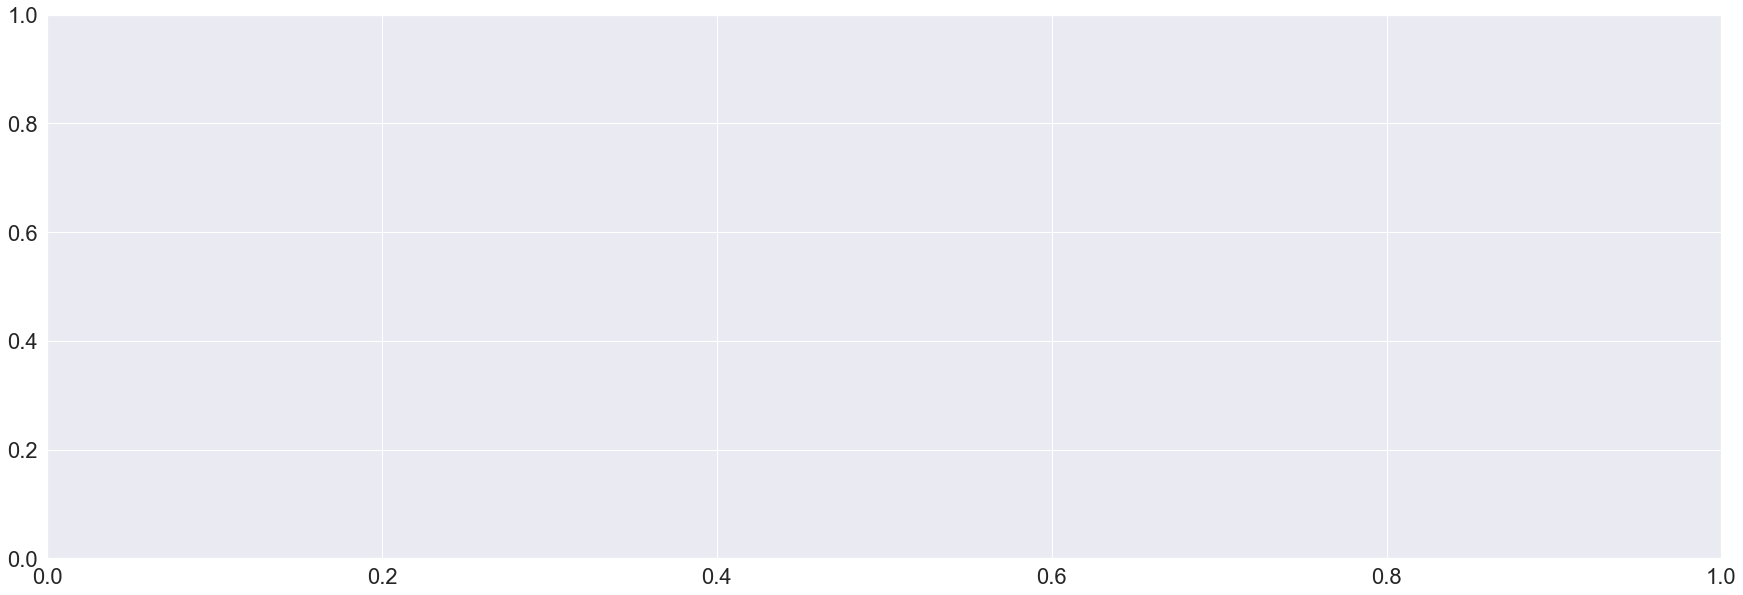

In [78]:
plt.subplots(figsize = (30,10))
sns.kdeplot(
   data=data_copy, x="log_LifetimeGross", hue="Actor1",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.title('Distribution of Actor',fontdict={'size' :40})
plt.xlabel('Lifetime Gross (log - Million$)',fontdict={'size' :30})
plt.ylabel('Density',fontdict={'size' :30})
plt.savefig("Distribution of Actor")
plt.show()

## creative_type

In [79]:
data['creative_type'].value_counts(dropna=False)

Contemporary Fiction       3555
NaN                        2396
Historical Fiction          849
Factual                     787
Dramatization               543
Science Fiction             369
Fantasy                     358
Kids Fiction                334
Super Hero                  104
Multiple Creative Types       7
Name: creative_type, dtype: int64

In [80]:
data['creative_type'].fillna('Others',inplace=True)
data.loc[data['creative_type'] == 'Multiple Creative Types', 'creative_type'] = 'Others'

data['creative_type'].value_counts(dropna=False)

Contemporary Fiction    3555
Others                  2403
Historical Fiction       849
Factual                  787
Dramatization            543
Science Fiction          369
Fantasy                  358
Kids Fiction             334
Super Hero               104
Name: creative_type, dtype: int64

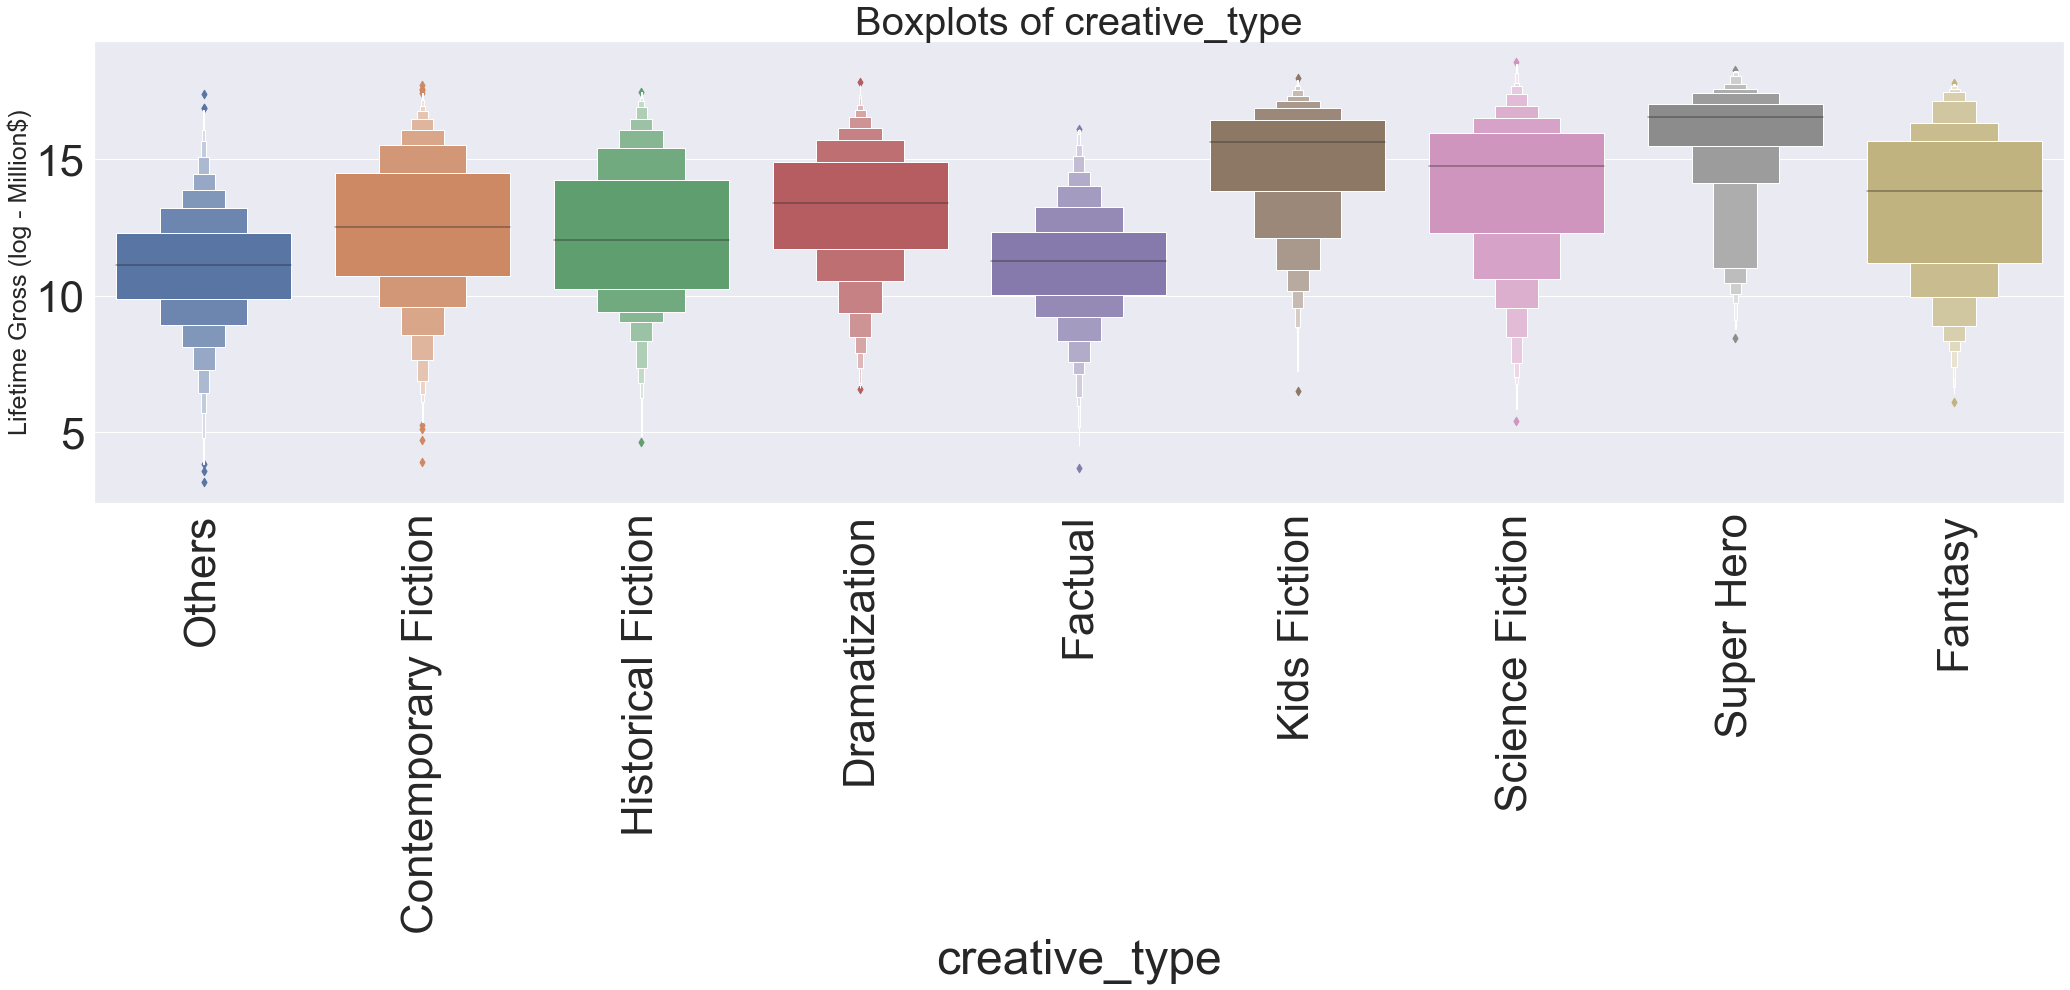

<Figure size 2160x1080 with 0 Axes>

In [81]:
sns.set(rc={'figure.figsize':(30,15)},font_scale=4)
plt.xticks(rotation=90)
bx_creative_type = sns.boxenplot(x="creative_type", y="log_LifetimeGross", data=data)
plt.title('Boxplots of creative_type',fontdict={'size' :40})
plt.ylabel('Lifetime Gross (log - Million$)',fontdict={'size' :25})
plt.tight_layout()
plt.show()



plt.savefig("Box plot of creative type")


## Source

In [82]:
data['source'].value_counts(dropna=False)

Original Screenplay                    3747
NaN                                    2370
Based on Fiction Book/Short Story      1027
Based on Real Life Events              1002
Remake                                  205
Based on Comic/Graphic Novel            179
Based on Factual Book/Article           156
Based on TV                             133
Based on Play                           128
Based on Musical or Opera                98
Based on Folk Tale/Legend/Fairytale      54
Spin-Off                                 33
Based on Game                            31
Based on Ballet                          28
Compilation                              24
Based on Movie                           20
Based on Short Film                      17
Based on Toy                             15
Based on Religious Text                  15
Based on Musical Group                    9
Based on Theme Park Ride                  8
Based on Web Series                       2
Based on Song                   

In [83]:
data['source'].fillna('Others',inplace=True)

data['source'].value_counts(dropna=False)



source_keep_list = data['source'].value_counts(dropna=False).index[:11].tolist()
source_method_list = data['source'].value_counts(dropna=False).index.tolist()

for i in source_method_list:
    if i not in source_keep_list:
        data.loc[data['source'] == i, 'source'] = 'Others'
        
data['source'].value_counts(dropna=False)

Original Screenplay                    3747
Others                                 2573
Based on Fiction Book/Short Story      1027
Based on Real Life Events              1002
Remake                                  205
Based on Comic/Graphic Novel            179
Based on Factual Book/Article           156
Based on TV                             133
Based on Play                           128
Based on Musical or Opera                98
Based on Folk Tale/Legend/Fairytale      54
Name: source, dtype: int64

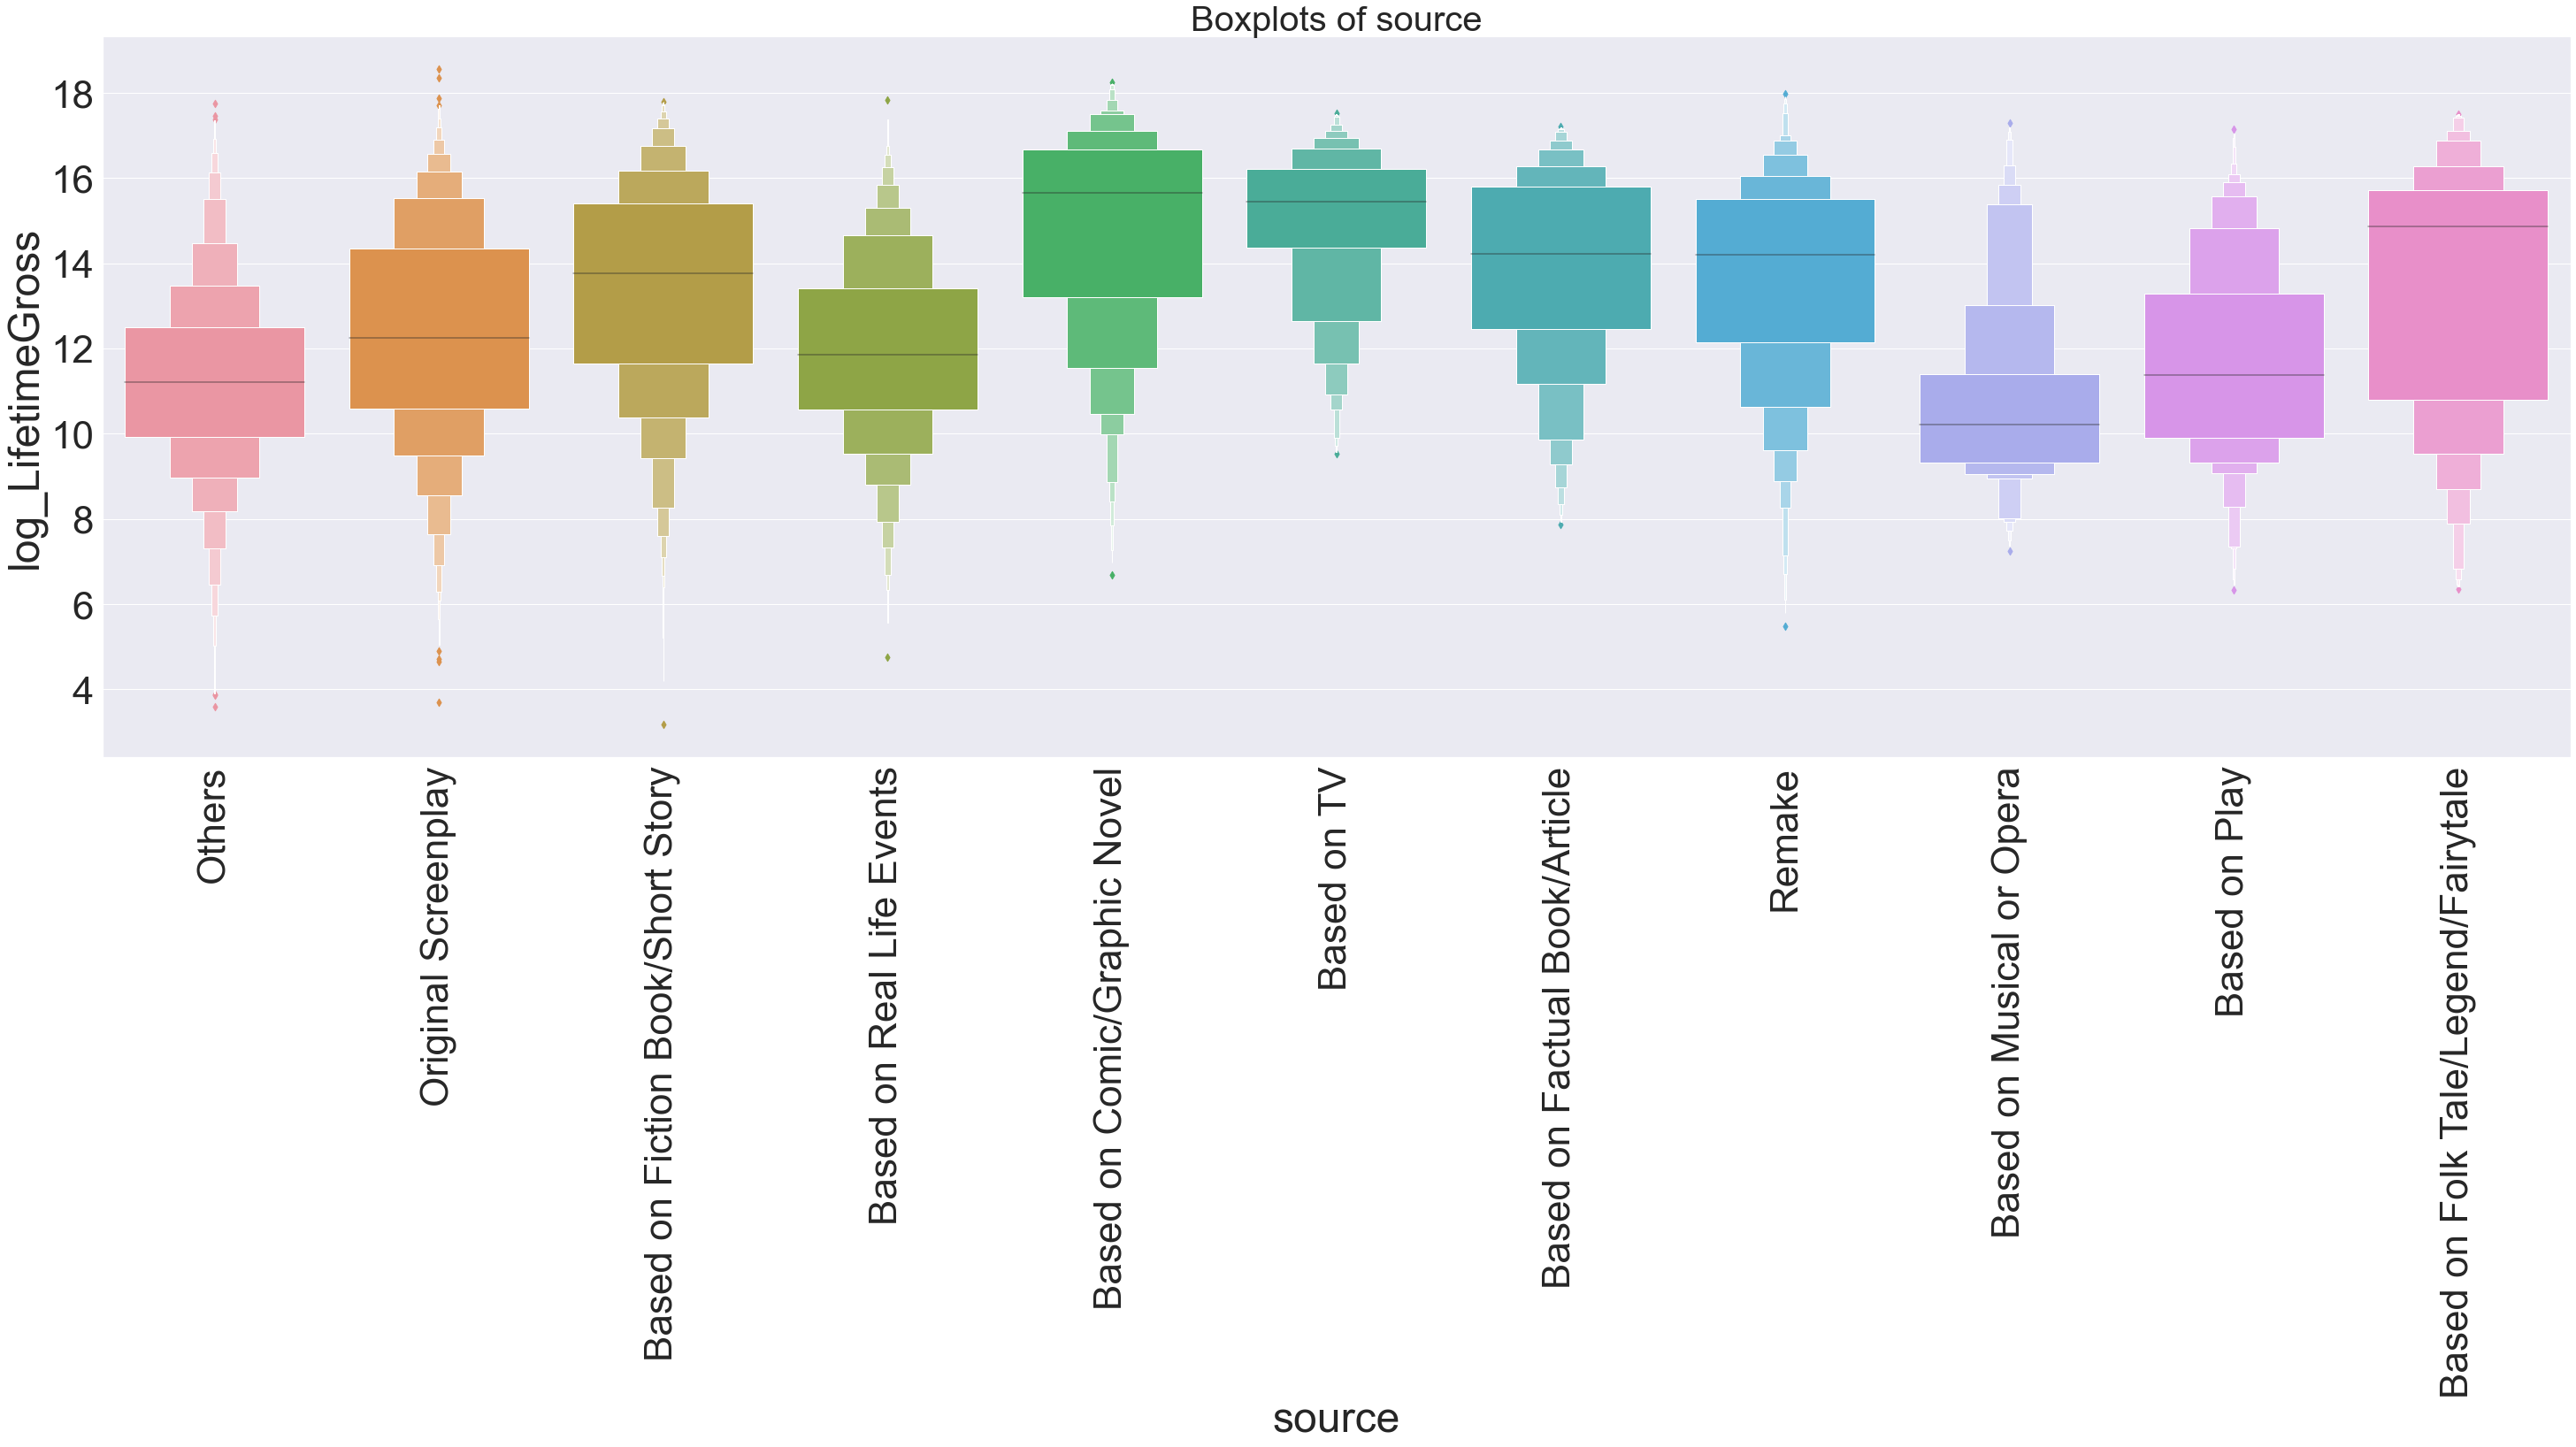

In [84]:
sns.set(rc={'figure.figsize':(50,15)},font_scale=4)
plt.xticks(rotation=90)
ax = sns.boxenplot(x="source", y="log_LifetimeGross", data=data)
plt.title('Boxplots of source',fontdict={'size' :40})
plt.savefig("Boxplots of source")
plt.show()

## further eda for lifetime gross and week gross

In [85]:
first_column = data.pop("log_LifetimeGross")
data.insert(0, "log_LifetimeGross", first_column)
data.drop(['mon_yr','month','Year','Preview Gross'], axis=1, inplace=True)
data.head()

,log_LifetimeGross,Release Date,Rating,Genre1,Genre2,Country,Director1,Actor1,Lifetime Gross,Opening Day,Lifetime multiple of Opening Week,production_budget,creative_type,source,production_method,sequel,running_time,sequel_NaN,running_time_NaN,production_budget_NaN,Genre2_NaN
0,8.935,2022-01-29,Unclassified,Opera,Live,Europe,Others,Others,7594,Saturday,NaN,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
1,7.695,2022-01-28,Unclassified,Comedy,Romance,Asia,Others,Others,2197,Friday,NaN,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
2,12.018,2022-01-27,Unrestricted,Drama,NaN,Europe,Pedro Almodovar,Others,165725,Thursday,NaN,0.000,Others,Others,NaN,0.000,0.000,1,1,1,1
3,11.848,2022-01-27,Unrestricted,Drama,Romance,Asia,Others,Others,139792,Thursday,NaN,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
4,11.625,2022-01-27,Unrestricted,Comedy,Drama,USA,Others,Others,111848,Thursday,NaN,0.000,Contemporary Fiction,Original Screenplay,Live Action,0.000,100.000,0,0,1,0


In [86]:
data.drop(['Lifetime multiple of Opening Week'], axis=1, inplace=True)

In [87]:
data_copy3 = data.copy()
data_copy3.drop('Lifetime Gross', axis=1, inplace=True)
data_copy2 = data_copy3.copy()
data_copy2.head()

,log_LifetimeGross,Release Date,Rating,Genre1,Genre2,Country,Director1,Actor1,Opening Day,production_budget,creative_type,source,production_method,sequel,running_time,sequel_NaN,running_time_NaN,production_budget_NaN,Genre2_NaN
0,8.935,2022-01-29,Unclassified,Opera,Live,Europe,Others,Others,Saturday,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
1,7.695,2022-01-28,Unclassified,Comedy,Romance,Asia,Others,Others,Friday,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
2,12.018,2022-01-27,Unrestricted,Drama,NaN,Europe,Pedro Almodovar,Others,Thursday,0.000,Others,Others,NaN,0.000,0.000,1,1,1,1
3,11.848,2022-01-27,Unrestricted,Drama,Romance,Asia,Others,Others,Thursday,0.000,Others,Others,NaN,0.000,0.000,1,1,1,0
4,11.625,2022-01-27,Unrestricted,Comedy,Drama,USA,Others,Others,Thursday,0.000,Contemporary Fiction,Original Screenplay,Live Action,0.000,100.000,0,0,1,0


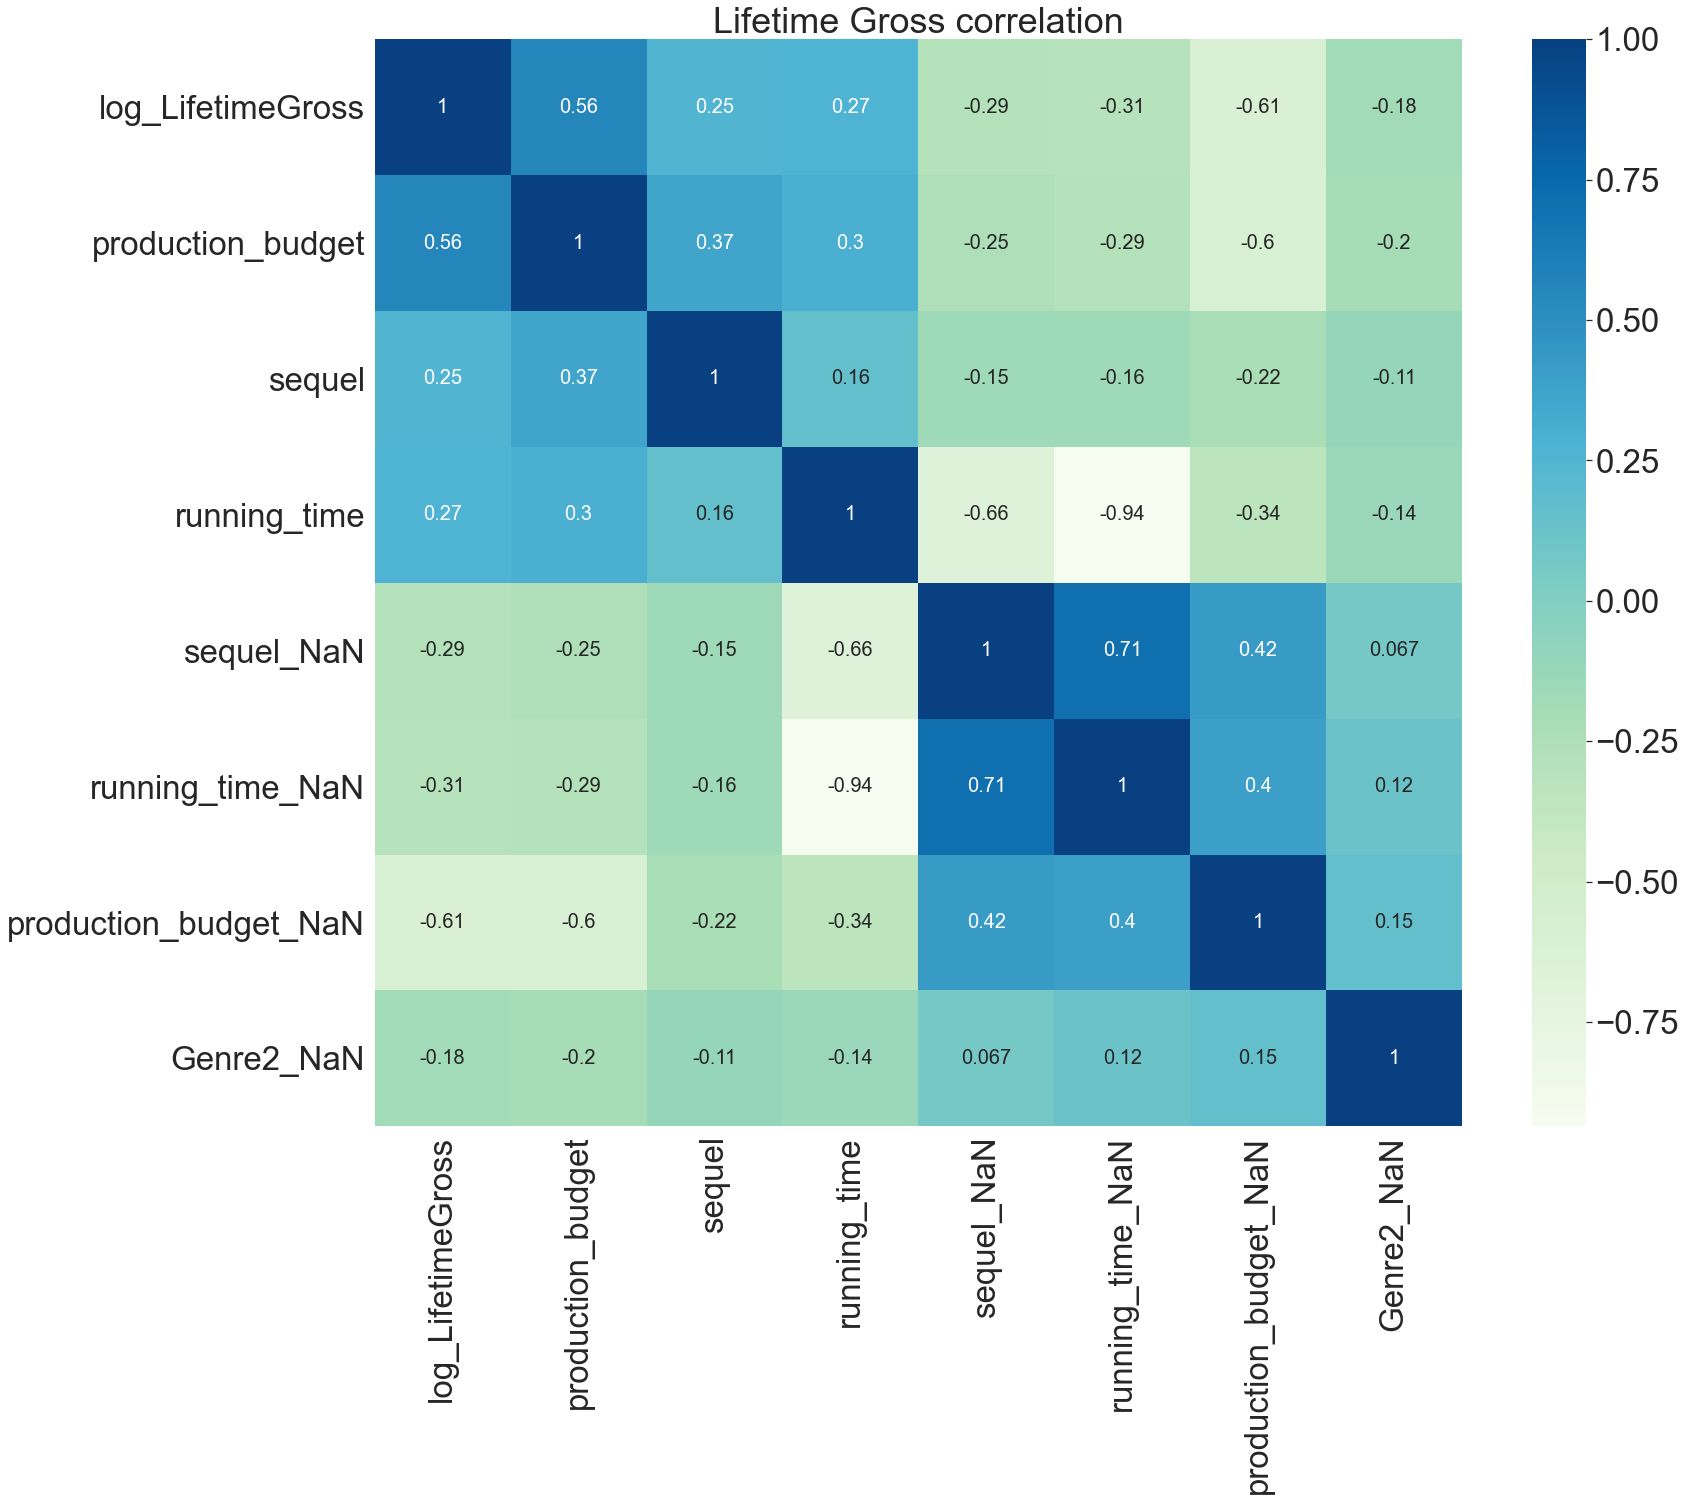

In [88]:
corrmap = data_copy2.corr()['log_LifetimeGross'].round(3).sort_values()
data_corr = data_copy2[corrmap.loc[(corrmap > 0.03)|(corrmap < -0.03)].index]
sns.set(font_scale=3)
plt.subplots(figsize = (25,20))
sns.heatmap(data_copy2.corr(), square = True, annot = True, cmap = 'GnBu',annot_kws={"size": 20})
plt.title('Lifetime Gross correlation')
plt.savefig('Lifetime Gross Corr')
plt.show()

In [89]:

data_copy2.to_csv('undummy.csv', index = False)
data_copy2.columns

Index(['log_LifetimeGross', 'Release Date', 'Rating', 'Genre1', 'Genre2',
       'Country', 'Director1', 'Actor1', 'Opening Day', 'production_budget',
       'creative_type', 'source', 'production_method', 'sequel',
       'running_time', 'sequel_NaN', 'running_time_NaN',
       'production_budget_NaN', 'Genre2_NaN'],
      dtype='object')

In [90]:
clean = pd.get_dummies(data_copy2,drop_first = True)

print(clean.shape)
clean.head()

(9302, 117)


,log_LifetimeGross,Release Date,production_budget,sequel,running_time,sequel_NaN,running_time_NaN,production_budget_NaN,Genre2_NaN,Rating_Unclassified,Rating_Unrestricted,Genre1_Adventure,Genre1_Animated,Genre1_Ballet,Genre1_Comedy,Genre1_Concert,Genre1_Documentary,Genre1_Drama,Genre1_Family,Genre1_Horror,Genre1_Opera,Genre1_Others,Genre1_Play,Genre1_Romance,Genre1_Romantic Comedy,Genre1_Thriller,Genre2_Animated,Genre2_Biography,Genre2_Comedy,Genre2_Crime,Genre2_Drama,Genre2_Family,Genre2_Horror,Genre2_Live,Genre2_Music,Genre2_Musical,Genre2_Others,Genre2_Romance,Genre2_Sci-fi,Genre2_Thriller,Country_Australia,Country_Europe,Country_Others,Country_USA,Director1_Clint Eastwood,Director1_Danny Boyle,Director1_Dennis Dugan,Director1_Francois Ozon,Director1_Kriv Stenders,Director1_Lasse Hallstrom,Director1_M. Night Shyamalan,Director1_Martin Scorsese,Director1_Michael Winterbottom,Director1_Nicholas Hytner,Director1_Others,Director1_Pedro Almodovar,Director1_Peter Jackson,Director1_Phil Grabsky,Director1_Priyadarshan,Director1_Richard Linklater,Director1_Ridley Scott,Director1_Robert Rodriguez,Director1_Robert Zemeckis,Director1_Rohit Shetty,Director1_Ron Howard,Director1_Shawn Levy,Director1_Stephen Frears,Director1_Steven Soderbergh,Director1_Steven Spielberg,Director1_Tim Burton,Director1_Woody Allen,Actor1_Akshay Kumar,Actor1_Amitabh Bachchan,Actor1_Bruce Willis,Actor1_Ewan McGregor,Actor1_George Clooney,Actor1_Jackie Chan,Actor1_Johnny Depp,Actor1_Liam Neeson,Actor1_Mark Wahlberg,Actor1_Matt Damon,Actor1_Nicole Kidman,Actor1_Others,Actor1_Ryan Reynolds,Actor1_Salman Khan,Actor1_Tom Cruise,Actor1_Tom Hanks,Opening Day_Monday,Opening Day_Saturday,Opening Day_Sunday,Opening Day_Thursday,Opening Day_Tuesday,Opening Day_Wednesday,creative_type_Dramatization,creative_type_Factual,creative_type_Fantasy,creative_type_Historical Fiction,creative_type_Kids Fiction,creative_type_Others,creative_type_Science Fiction,creative_type_Super Hero,source_Based on Factual Book/Article,source_Based on Fiction Book/Short Story,source_Based on Folk Tale/Legend/Fairytale,source_Based on Musical or Opera,source_Based on Play,source_Based on Real Life Events,source_Based on TV,source_Original Screenplay,source_Others,source_Remake,production_method_Digital Animation,production_method_Hand Animation,production_method_Live Action,production_method_Multiple Production Methods,production_method_Rotoscoping,production_method_Stop-Motion Animation
0,8.935,2022-01-29,0.000,0.000,0.000,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,7.695,2022-01-28,0.000,0.000,0.000,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,12.018,2022-01-27,0.000,0.000,0.000,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,11.848,2022-01-27,0.000,0.000,0.000,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,11.625,2022-01-27,0.000,0.000,100.000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [91]:
clean.to_csv('Cleaned Data.csv', index = False)

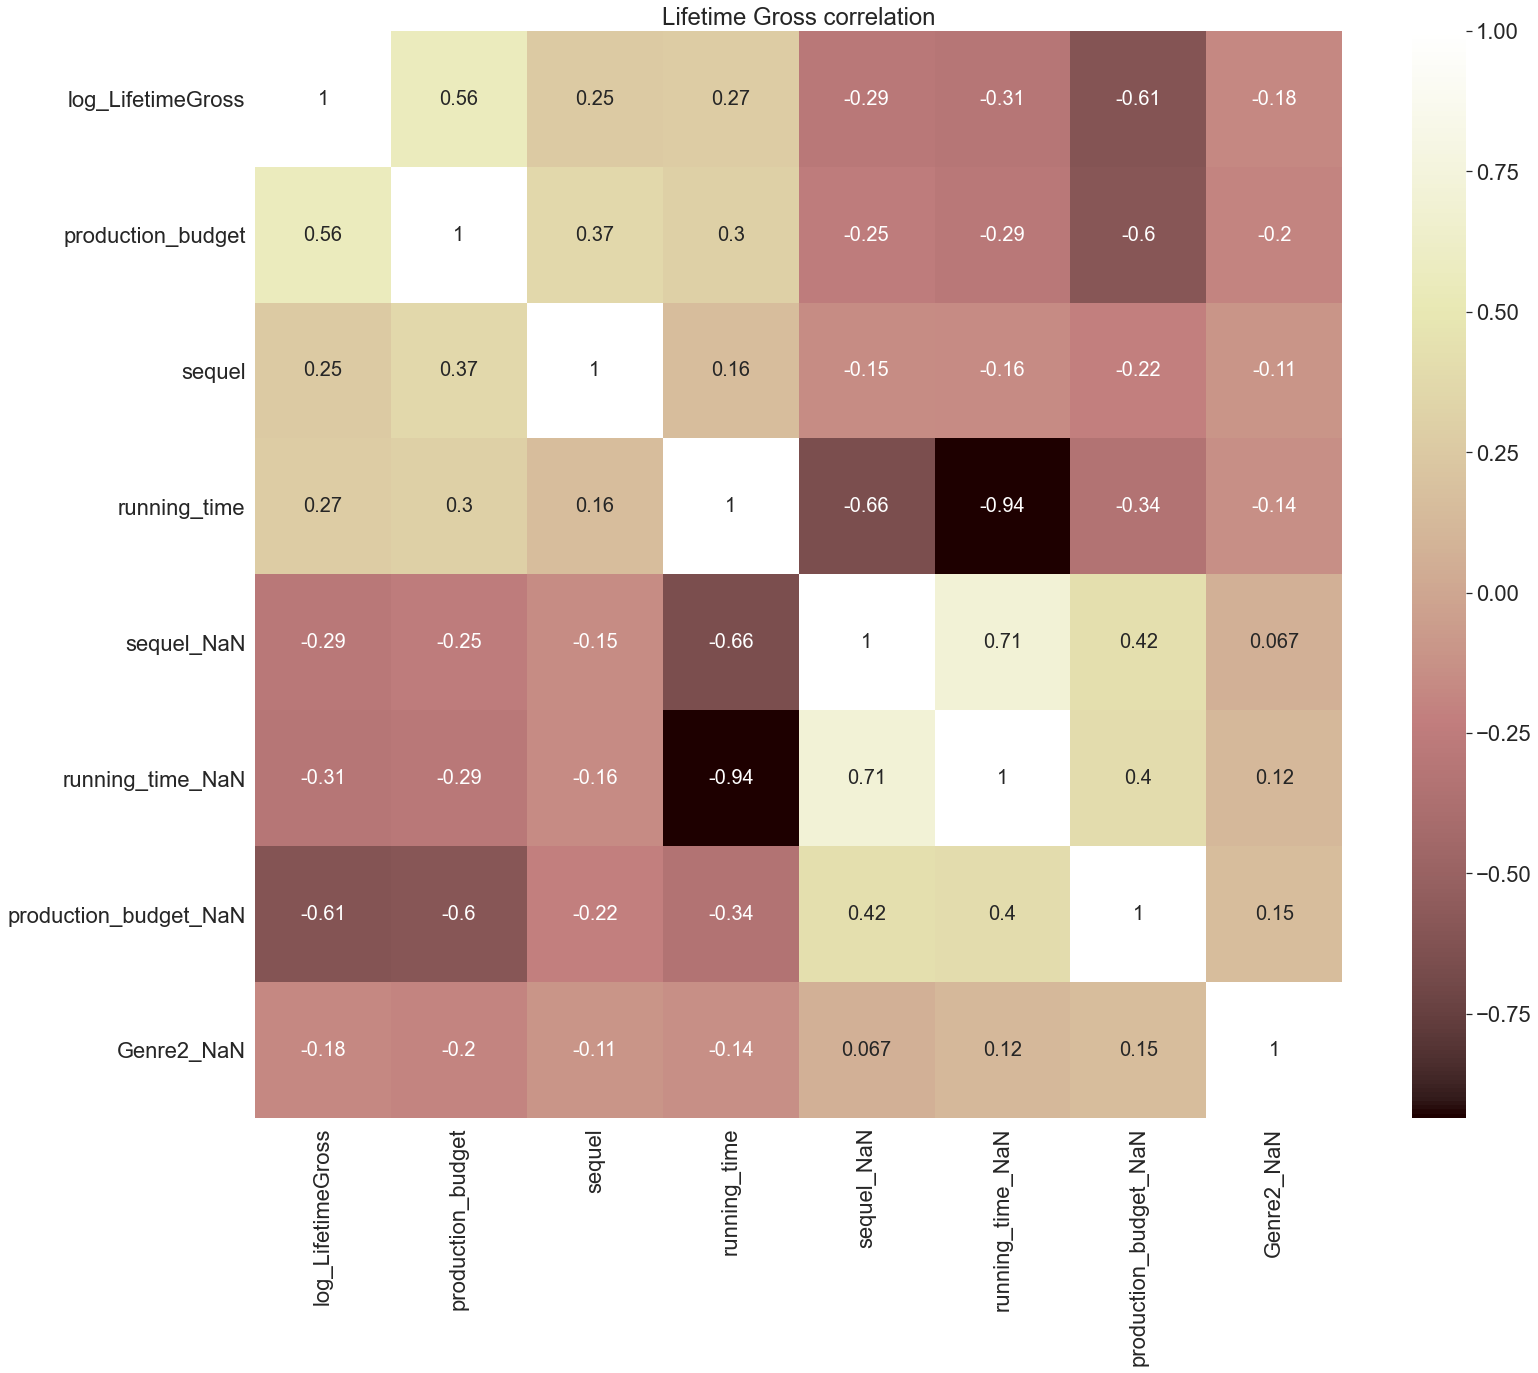

In [92]:
corrmap = data_copy2.corr()['log_LifetimeGross'].round(3).sort_values()
data_corr = data_copy2[corrmap.loc[(corrmap > 0.03)|(corrmap < -0.03)].index]

sns.set(font_scale=2)

plt.subplots(figsize = (25,20))
sns.heatmap(data_copy2.corr(), square = True, annot = True, cmap = 'pink',annot_kws={"size": 20})
plt.title('Lifetime Gross correlation')
plt.savefig('final_log_Lifetime Gross Corr')
plt.show()

In [93]:
clean.isnull().sum()

log_LifetimeGross                                0
Release Date                                     0
production_budget                                0
sequel                                           0
running_time                                     0
sequel_NaN                                       0
running_time_NaN                                 0
production_budget_NaN                            0
Genre2_NaN                                       0
Rating_Unclassified                              0
Rating_Unrestricted                              0
Genre1_Adventure                                 0
Genre1_Animated                                  0
Genre1_Ballet                                    0
Genre1_Comedy                                    0
Genre1_Concert                                   0
Genre1_Documentary                               0
Genre1_Drama                                     0
Genre1_Family                                    0
Genre1_Horror                  

# Modelling

In [94]:
data = clean

In [95]:
print(data.shape)

(9302, 117)


In [96]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [97]:
train_indices, test_indices = train_test_split(
        np.array(data.index), test_size=0.2, random_state=0)
X_train = data.loc[train_indices].drop(columns=['log_LifetimeGross', 'Release Date'])
y_train = data.loc[train_indices]['log_LifetimeGross']
X_test = data.loc[test_indices].drop(columns=['log_LifetimeGross', 'Release Date'])
y_test = data.loc[test_indices]['log_LifetimeGross']

In [98]:
X_train.columns

Index(['production_budget', 'sequel', 'running_time', 'sequel_NaN',
       'running_time_NaN', 'production_budget_NaN', 'Genre2_NaN',
       'Rating_Unclassified', 'Rating_Unrestricted', 'Genre1_Adventure',
       ...
       'source_Based on TV', 'source_Original Screenplay', 'source_Others',
       'source_Remake', 'production_method_Digital Animation',
       'production_method_Hand Animation', 'production_method_Live Action',
       'production_method_Multiple Production Methods',
       'production_method_Rotoscoping',
       'production_method_Stop-Motion Animation'],
      dtype='object', length=115)

## Lasso

[-476286.15225655475, -457236.97394457925, -438576.5501181426, -420304.83380507695, -402421.9209482529, -384927.7625335191, -367822.3585608668, -352375.87423920876, -335989.093385797, -319992.464541928, -304385.9877076032, -289169.66288282553, -274343.4900675892, -259907.46926189953, -245861.60046575204, -232205.86897523858, -218940.30503816303, -206064.8930859281, -194188.57362758002, -182055.4192812895, -170314.18075777934, -158963.7490273088, -148004.68723410665, -137437.76100359872, -127261.15954265557, -117476.21698455505, -112610.29073229078, -103739.28667919237, -94723.0559072492, -85866.0127330781, -77088.9460131265, -69336.49763774958, -61897.224009614656, -52484.95924775438, -44797.326333001285, -39134.095838630616, -33923.14345634862, -28679.93441177401, -25001.11442096165, -20842.68840360984, -17062.29790475546, -13659.940553174874, -10639.758286839764, -8460.782737652755, -5739.650162917371, -3872.776431963418, -2360.6265319351587, -1217.9706000218519, -445.11506313782365,

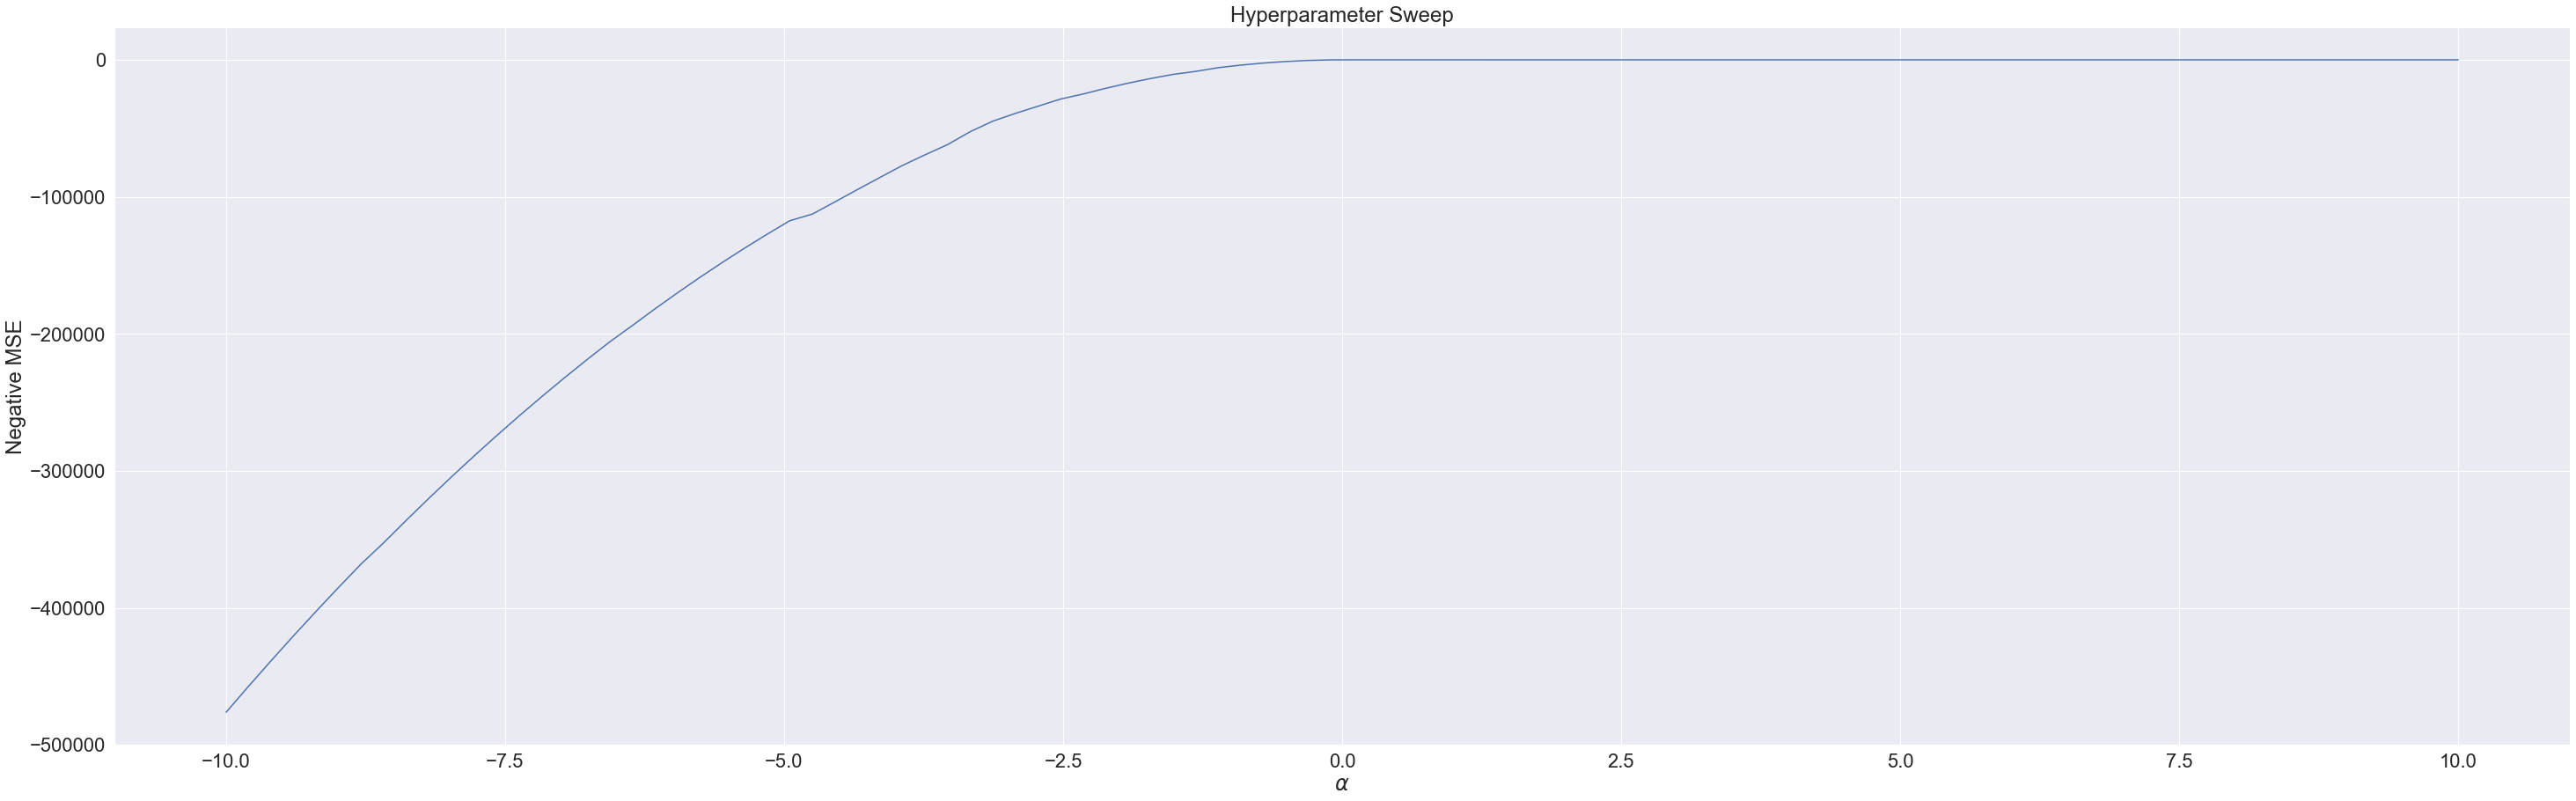

Alpha:0.10
R^2: 0.282
RMSLE: 1.755
RMSE: 5035270.684
MAE: 1794591.408


In [99]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_lasso= scaler.transform(X_train)
X_test_lasso= scaler.transform(X_test)

alphas = np.linspace(-10, 10, 100)
# alphas = np.logspace(-5, 4, 100)
# print(alphas)

scores=[]

for alpha in alphas:
    model=Lasso(alpha=alpha)
    cv_scores=cross_val_score(model,X_train_lasso,y_train,cv=5,scoring='neg_mean_squared_error')
    scores.append(cv_scores.mean())
print(scores)
plt.plot(alphas, scores)
plt.title('Hyperparameter Sweep')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
# plt.savefig('plot')
plt.show()

best_index=np.argmax(scores)
best_alpha=alphas[best_index]
print(f'Alpha:{best_alpha:.2f}')

model=Lasso(alpha=best_alpha,max_iter=10000)
model.fit(X_train_lasso,y_train)
pred_test=model.predict(X_test_lasso)

y_pred=np.exp(pred_test)
y_true = np.exp(y_test)
rmse=mse(y_test,pred_test)**0.5
r2=r2_score(y_true,y_pred)
mae=mean_absolute_error(y_true, y_pred)
print('R^2: {:.3f}'.format(r2))
print('RMSLE: {:.3f}'.format(mean_squared_log_error(y_true, y_pred, squared=False)))
print('RMSE: {:.3f}'.format(mean_squared_error(y_true, y_pred, squared=False)))
print('MAE: {:.3f}'.format(mae))

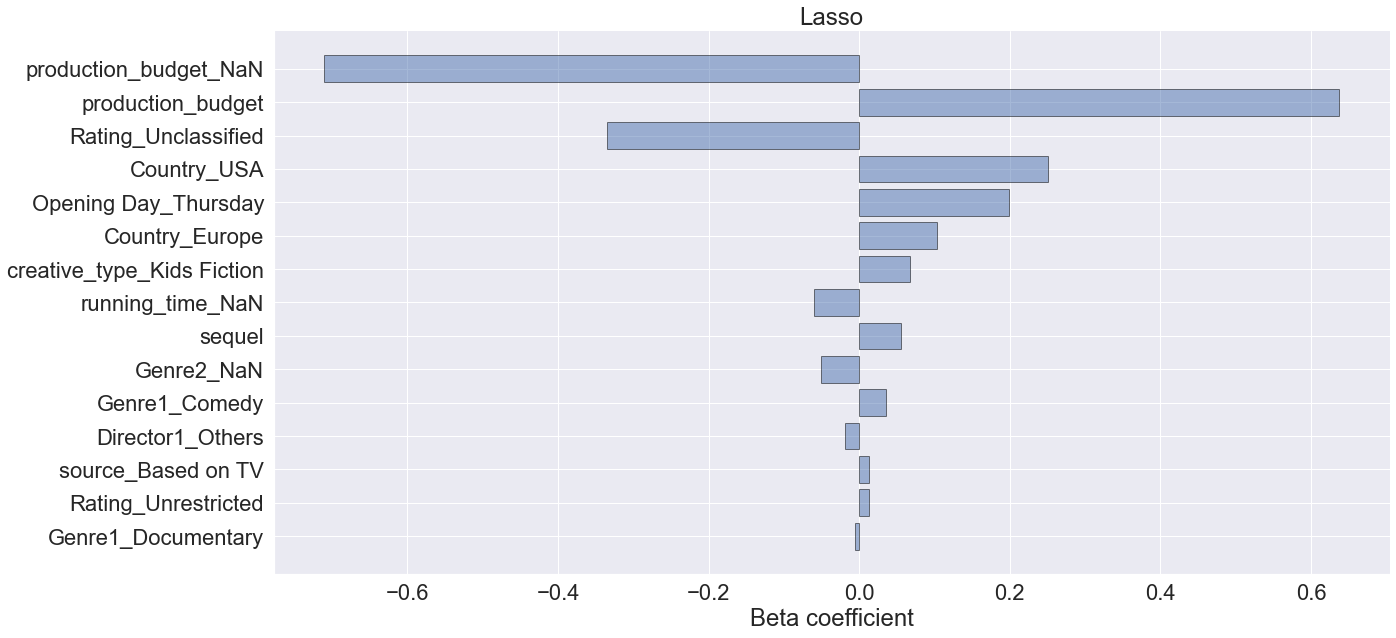

In [121]:
n_coefs = 15
betas = model.coef_
predictors = list(data.columns.values[2:-1])

indicies = np.argsort(np.abs(betas))[-n_coefs:]
top_predictors = np.array(predictors)[indicies]
top_betas = betas[indicies]

plt.barh(top_predictors, top_betas, alpha=0.5, edgecolor='black')
sns.despine()
plt.xlabel('Beta coefficient')
plt.title('Lasso');

In [122]:
predictors

['production_budget',
 'sequel',
 'running_time',
 'sequel_NaN',
 'running_time_NaN',
 'production_budget_NaN',
 'Genre2_NaN',
 'Rating_Unclassified',
 'Rating_Unrestricted',
 'Genre1_Adventure',
 'Genre1_Animated',
 'Genre1_Ballet',
 'Genre1_Comedy',
 'Genre1_Concert',
 'Genre1_Documentary',
 'Genre1_Drama',
 'Genre1_Family',
 'Genre1_Horror',
 'Genre1_Opera',
 'Genre1_Others',
 'Genre1_Play',
 'Genre1_Romance',
 'Genre1_Romantic Comedy',
 'Genre1_Thriller',
 'Genre2_Animated',
 'Genre2_Biography',
 'Genre2_Comedy',
 'Genre2_Crime',
 'Genre2_Drama',
 'Genre2_Family',
 'Genre2_Horror',
 'Genre2_Live',
 'Genre2_Music',
 'Genre2_Musical',
 'Genre2_Others',
 'Genre2_Romance',
 'Genre2_Sci-fi',
 'Genre2_Thriller',
 'Country_Australia',
 'Country_Europe',
 'Country_Others',
 'Country_USA',
 'Director1_Clint Eastwood',
 'Director1_Danny Boyle',
 'Director1_Dennis Dugan',
 'Director1_Francois Ozon',
 'Director1_Kriv Stenders',
 'Director1_Lasse Hallstrom',
 'Director1_M. Night Shyamalan',
 'D

## Ridge

MAE: 1981740.197
R^2: -0.477
Alpha: 376.494
RMSLE: 1.702
RMSE: 7222946.840
[ 5.74307236e-01  1.45135770e-01  1.27967802e-01  2.96021544e-02
 -1.43606122e-02 -6.01775732e-01 -1.29277566e-01 -4.47242947e-01
  6.49509180e-02  1.76177093e-02  2.19759232e-02 -2.78364456e-02
  1.10799835e-01  2.97637068e-03 -1.31538425e-01 -6.75286567e-02
 -2.31208092e-03 -5.86776752e-02 -1.62615178e-02 -1.59050899e-02
 -3.63013961e-02 -2.06383059e-02  2.02063677e-02 -3.02766619e-02
 -6.11651512e-03 -7.50890630e-03  4.81827551e-02 -5.49805551e-02
 -6.90441074e-02 -1.48172273e-03 -3.93191559e-02  7.51775470e-02
  1.19226682e-02 -2.07215301e-03 -1.18082480e-02 -1.04809308e-02
  2.00192465e-02 -3.74021278e-02  1.66907554e-01  2.94517601e-01
  8.92033591e-03  4.24117115e-01  2.45527857e-02  1.17962979e-02
  1.34818009e-02 -6.18615240e-03  2.29594485e-02  1.38275533e-02
  9.92516645e-03  4.72890745e-03  1.31356648e-02  4.03940629e-02
 -3.78261301e-02  3.19810352e-02 -8.26336727e-02  1.94705183e-02
 -1.80501169e-0

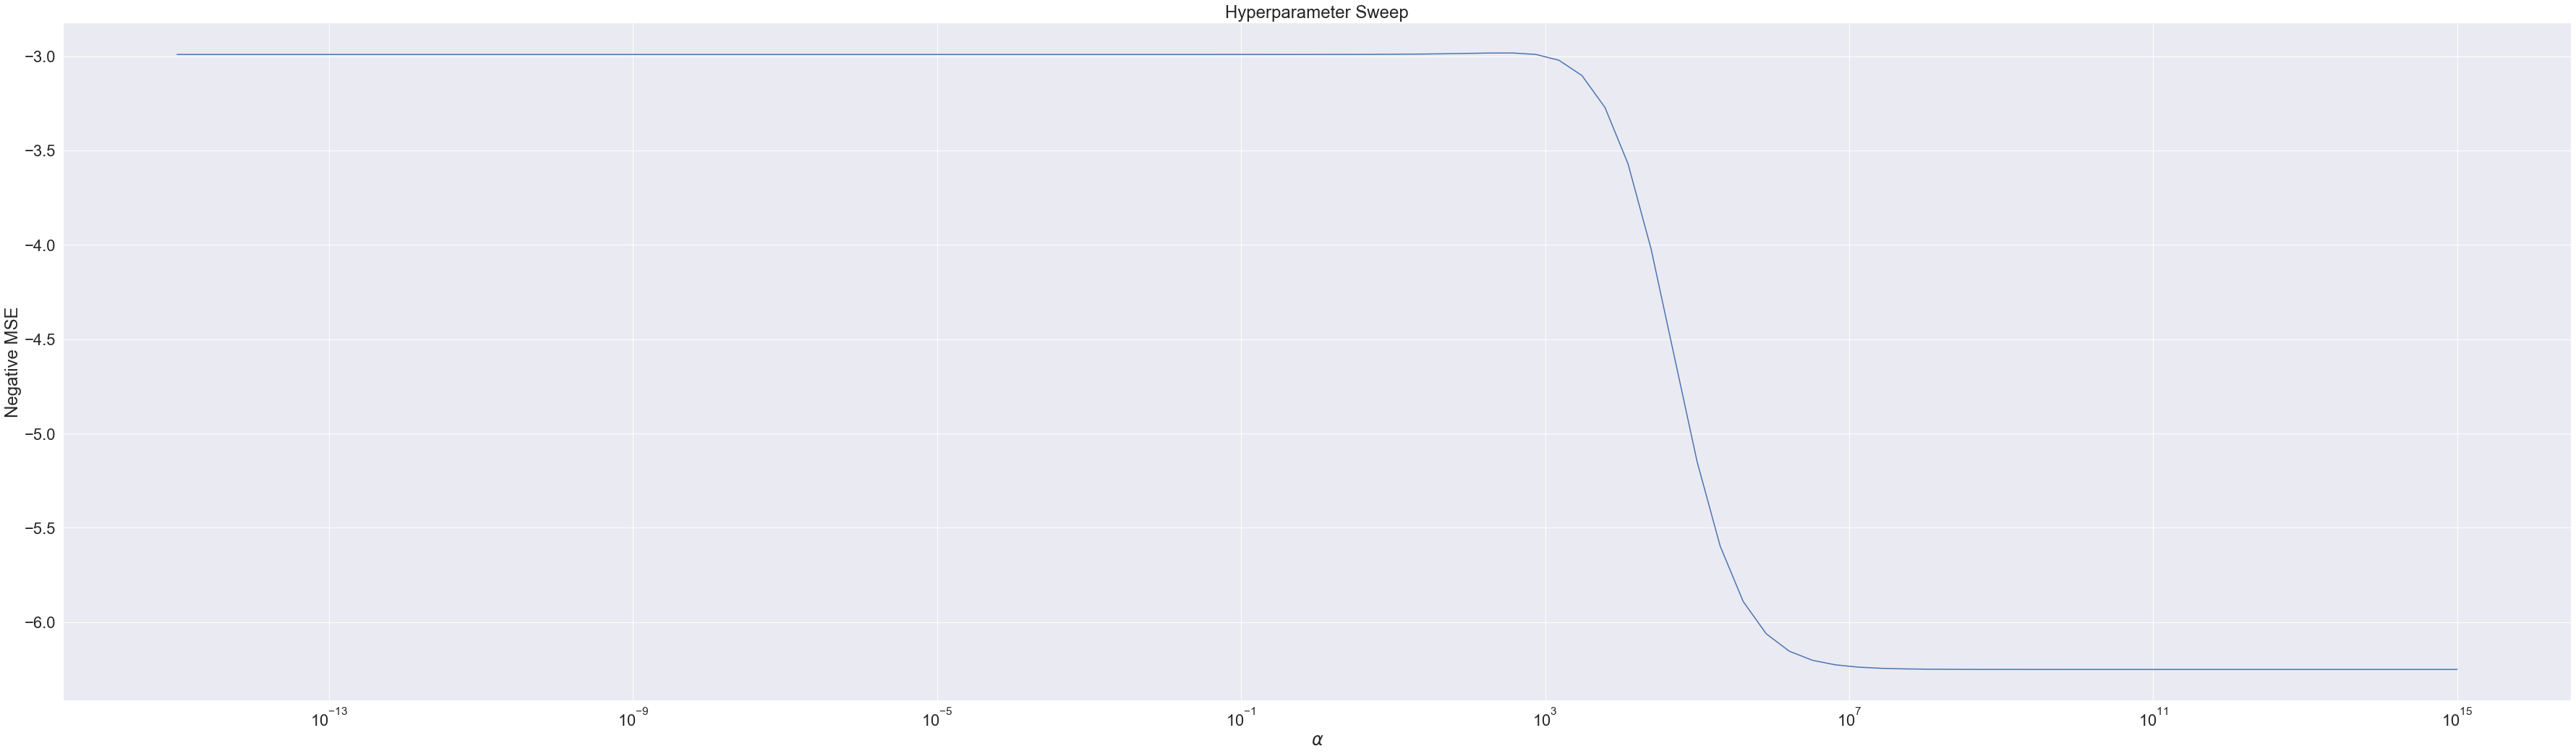

In [101]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# get list of alpha values
alphas = np.logspace(-15, 15, 100)
cv_errors=[]
#loop thru each alpha values:
for alpha in alphas:
    #initialise a blank Ridge model with alpha
    model_ridge = Ridge(alpha=alpha)
    #calculate the cross validation score
    error = cross_val_score(model_ridge,X_train_scaled,y_train,
                            cv=5,scoring='neg_mean_squared_error').mean()
    #add to the list
    cv_errors.append(error)
#generate plot of alpha vs cv cv_errors
plt.plot(alphas, cv_errors) 
plt.xscale('log')
plt.xlabel(r'$\alpha$')
plt.ylabel('Negative MSE')
plt.title('Hyperparameter Sweep')
plt.tight_layout()
plt.savefig('plot.png')
#find the best alpha
idx = np.argmax(cv_errors)
best_alpha = alphas[idx]
#fit a new Ridge model using the best alpha
model_ridge = Ridge(alpha=best_alpha).fit(X_train_scaled,y_train)
y_pred = model_ridge.predict(X_test_scaled)

y_pred=np.exp(y_pred)
y_true = np.exp(y_test)
r2=r2_score(y_true,y_pred)
rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae=mean_absolute_error(y_true, y_pred)
print('MAE: {:.3f}'.format(mae))
print('R^2: {:.3f}'.format(r2))
#print out the best alpha and rmse
print('Alpha: {:.3f}'.format(best_alpha))
print('RMSLE: {:.3f}'.format(rmsle))
print('RMSE: {:.3f}'.format(rmse))
print(model_ridge.coef_)

In [102]:
np.exp(187.382)

2.393142767183271e+81

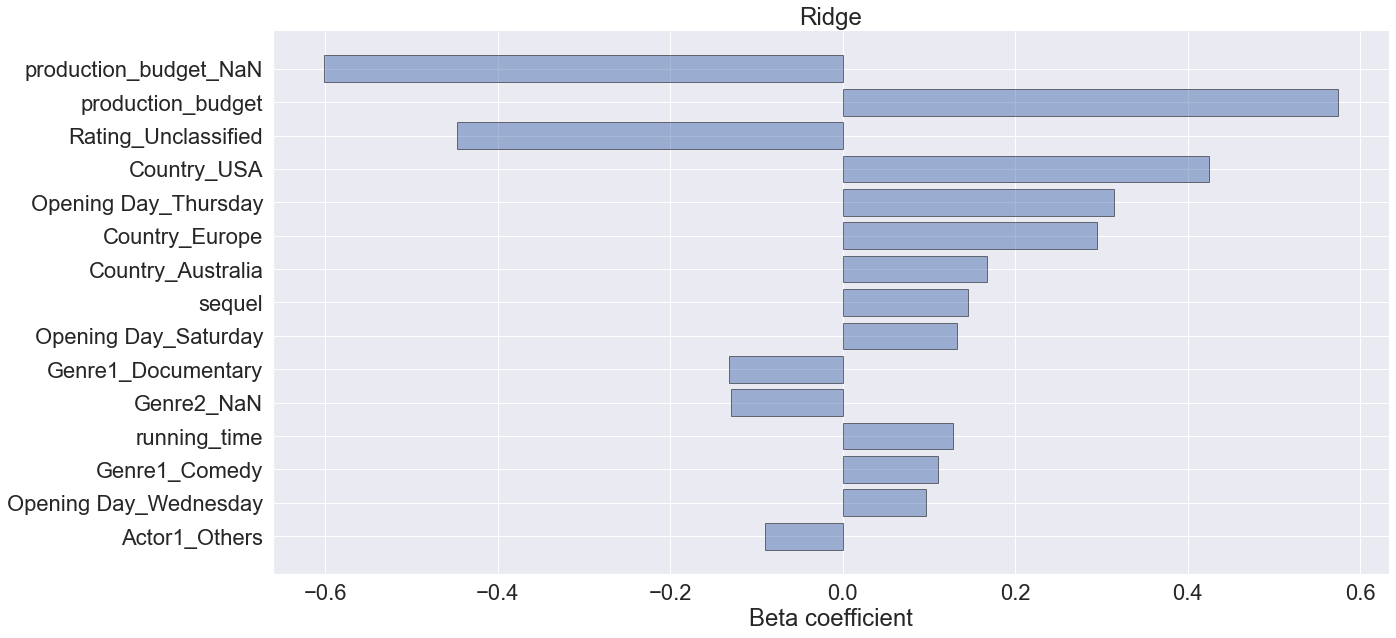

In [123]:
n_coefs = 15
betas = model_ridge.coef_
predictors = list(data.columns.values[2:-1])

indicies = np.argsort(np.abs(betas))[-n_coefs:]
top_predictors = np.array(predictors)[indicies]
top_betas = betas[indicies]

plt.barh(top_predictors, top_betas, alpha=0.5, edgecolor='black')
sns.despine()
plt.xlabel('Beta coefficient')
plt.title('Ridge');

## Random Forest

In [104]:
#dic of params to RandomizedSearchCV
parameters = {
            'min_samples_leaf': np.arange(1,100),
            'max_features'    : np.arange(1,len(X_train.columns)+1),
}
#set up and fit the random search object
random_search = RandomizedSearchCV(
    RandomForestRegressor(criterion='squared_error', random_state=0),
    parameters,
    n_iter=15,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=0
)
rf = random_search.fit(X_train, y_train)
print(rf.best_params_)

y_pred=np.exp(rf.predict(X_test))
y_true = np.exp(y_test)
rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2=r2_score(y_true,y_pred)
mae=mean_absolute_error(y_true, y_pred)
print('MAE: {:.3f}'.format(mae))
print('R^2: {:.3f}'.format(r2))
print('RMSLE: {:.3f}'.format(rmsle))
print('RMSE: {:.3f}'.format(rmse))

{'min_samples_leaf': 4, 'max_features': 36}
MAE: 1556718.436
R^2: 0.469
RMSLE: 1.650
RMSE: 4331676.842


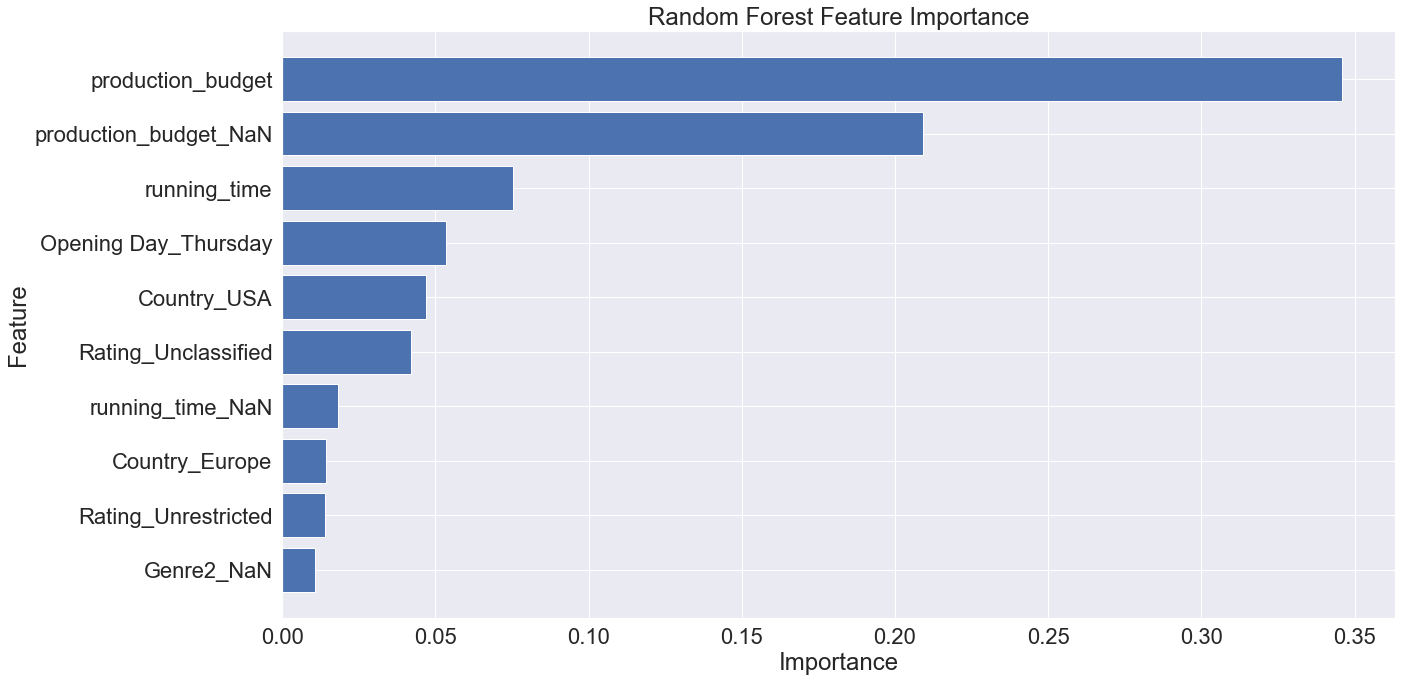

In [105]:
#rf.feature_importances_
#create a pd series w inportances
rf= RandomForestRegressor(criterion='squared_error', min_samples_leaf=4,
                            max_features=36, random_state=0)
rf.fit(X_train, y_train)

#rf.feature_importances_
#create a pd series w inportances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values()
sns.set(rc={'figure.figsize':(20,10)},font_scale=2)
plt.barh(range(10),importances[-10:], tick_label=importances.index[-10:])
plt.title('Random Forest Feature Importance')
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.tight_layout()
plt.savefig('feature importance.png')

## K Nearest Neighbour

(array([745., 744., 744., 744., 744., 744., 744., 744., 744., 744.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

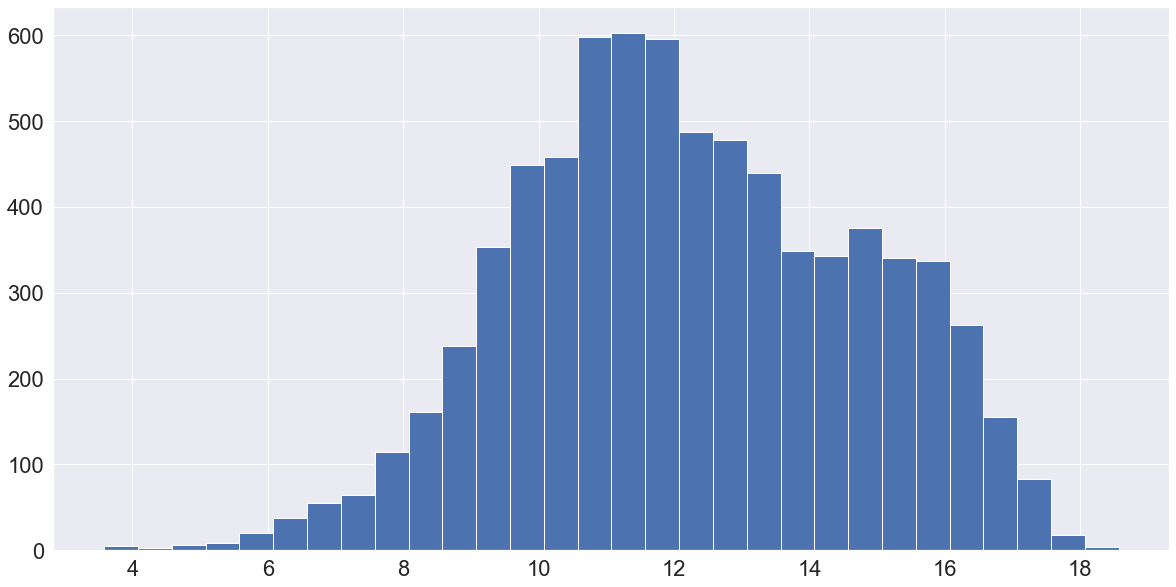

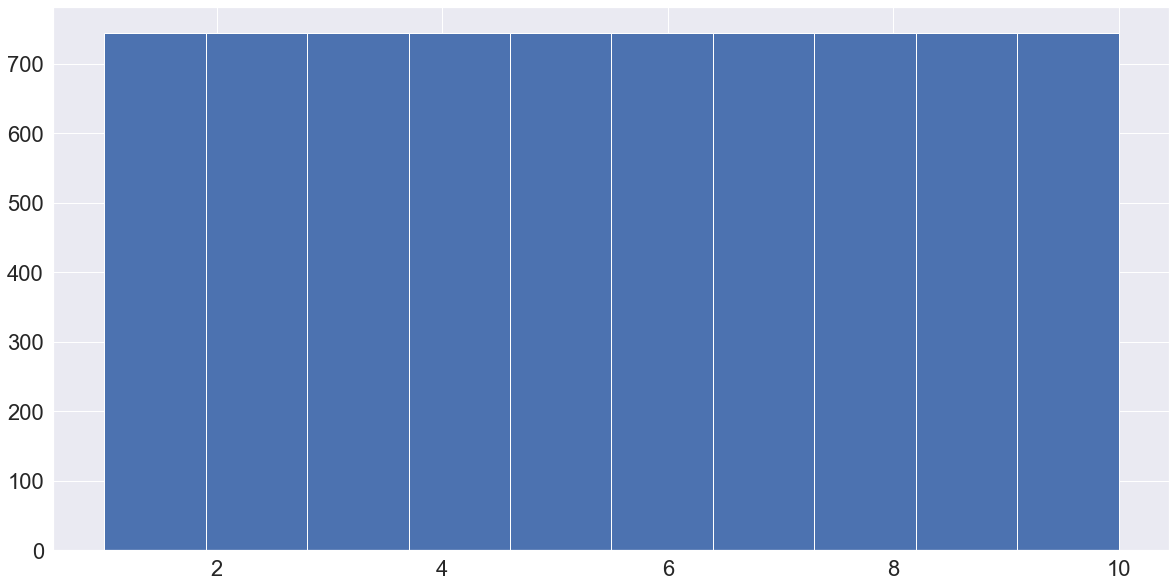

In [106]:
# Observe the distribution of the dataset
plt.hist(y_train,bins=30)
bins=10
t=[]
for i in range(bins):
    ti = i/bins
    t.append(ti)
yqlist = y_train.quantile(t).to_list()

def checkquan(a):
    b=1
    while b<len(yqlist) and a>yqlist[b] :
        b=b+1
    return b
ymctrain = y_train.apply(checkquan)
plt.figure()
plt.hist(ymctrain)

In [107]:
print(pca.explained_variance_ratio_)

NameError: name 'pca' is not defined

1284   10.075
3539   11.273
1515   12.766
8668    9.609
1070   10.947
Name: log_LifetimeGross, dtype: float64


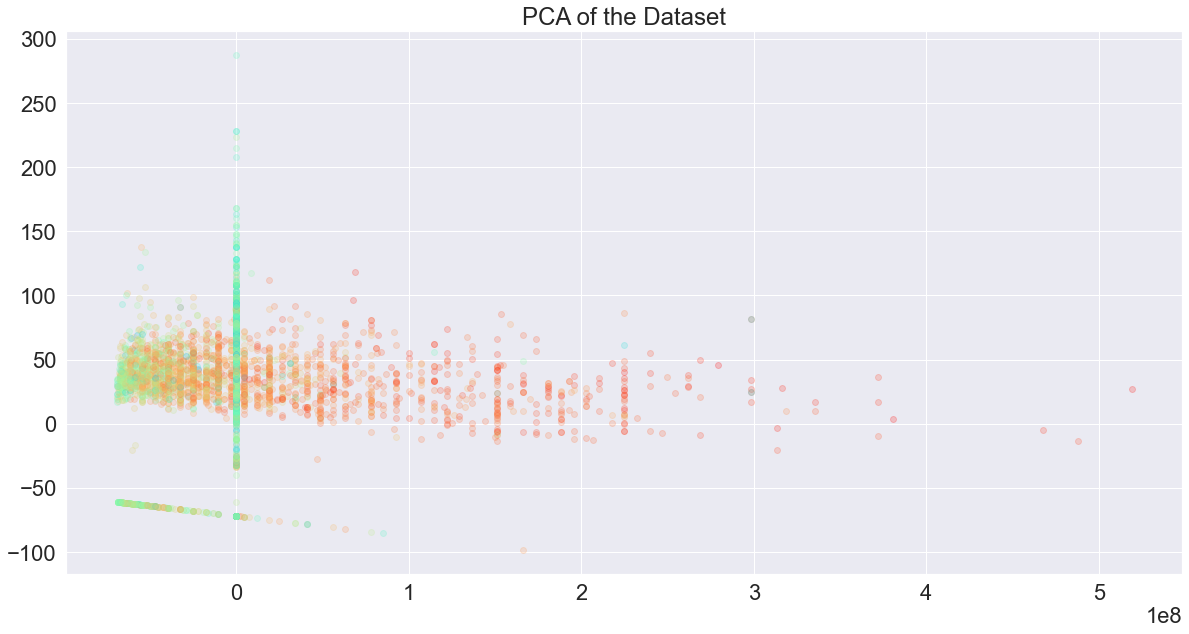

In [108]:
# standardisation 
X = X_train.copy()
y = y_train.copy()
X_testn=X_test.copy()

pdb_mean = X["production_budget"].replace(0, np.NaN).mean()

X["production_budget"]=(X["production_budget"].replace(0, pdb_mean))
X_testn["production_budget"]=(X_test["production_budget"].replace(0, pdb_mean))

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
X=principalComponents
X_testn = pca.transform(X_testn)
principalDf = pd.DataFrame(data = principalComponents)
print(y.head())

axx=principalComponents[:,0]
axy=principalComponents[:, 1]

colors = cm.rainbow((y-min(y))/(max(y)-min(y)))
for xs, ys, c in zip(axx, axy, colors):
  plt.scatter(xs, ys, color=c,alpha=0.2)
  plt.title('PCA of the Dataset')

RMSLE: 1.819
RMSE: 4524011.783
R^2: 0.4206
MAE: 1653497.229


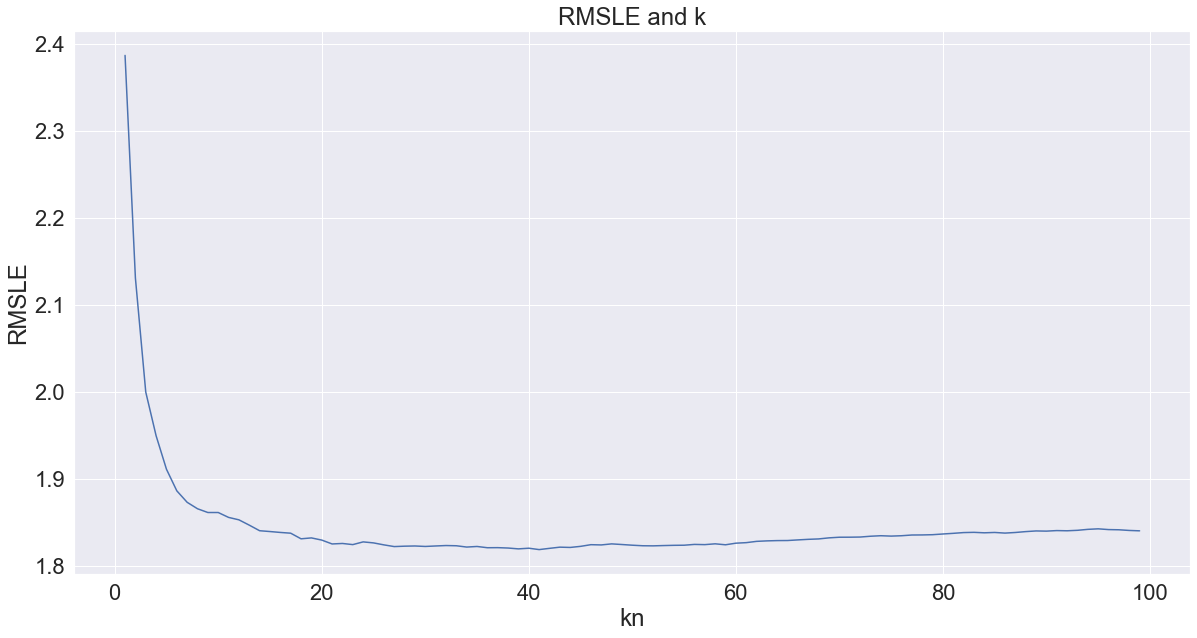

<Figure size 1440x720 with 0 Axes>

In [109]:
# build knn model
kn = range(1,100)
rmsleerrors=[]
rmseerrors=[]
r2value=[]
maeerrors=[]

for i in kn:
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X, y)
    y_pred= np.exp(neigh.predict(X_testn))
    y_true = np.exp(y_test)
    rmsle = mean_squared_log_error(y_true, y_pred,squared=False)
    rmsleerrors.append(rmsle)
    rmse = mean_squared_error(y_true, y_pred,squared=False)
    rmseerrors.append(rmse)
    r2=r2_score(y_true, y_pred)
    r2value.append(r2)
    mae=mean_absolute_error(y_true, y_pred)
    maeerrors.append(mae)
plt.plot(kn, rmsleerrors)
plt.title('RMSLE and k')
plt.ylabel('RMSLE')
plt.xlabel('kn')
plt.figure()

print('RMSLE: {:.3f}'.format(min(rmsleerrors)))
print('RMSE: {:.3f}'.format(min(rmseerrors)))
print('R^2: {:.4f}'.format(max(r2value)))
print('MAE: {:.3f}'.format(min(maeerrors)))

In [110]:
#find k
print(rmsleerrors.index(min(rmsleerrors)))

40


## stacking

In [111]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

stack = StackingCVRegressor(regressors=[model,neigh,rf], meta_regressor=LinearRegression(), 
                           cv=5, random_state=1, store_train_meta_features=True)
stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=LinearRegression(), random_state=1,
                    regressors=[Lasso(alpha=0.10101010101010033,
                                      max_iter=10000),
                                KNeighborsRegressor(n_neighbors=99),
                                RandomForestRegressor(max_features=36,
                                                      min_samples_leaf=4,
                                                      random_state=0)],
                    store_train_meta_features=True)

In [112]:
stack.meta_regr_.coef_

array([ 0.02630432, -0.01405547,  0.99779118])

In [113]:
y_pred=np.exp(stack.predict(X_test))
y_true = np.exp(y_test)
rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2=r2_score(y_true,y_pred)
mae=mean_absolute_error(y_true, y_pred)
print('MAE: {:.3f}'.format(mae))
print('R^2: {:.3f}'.format(r2))
print('RMSLE: {:.3f}'.format(rmsle))
print('RMSE: {:.3f}'.format(rmse))

MAE: 1552827.741
R^2: 0.483
RMSLE: 1.650
RMSE: 4272193.176


In [114]:
#without negative coe
stack = StackingCVRegressor(regressors=[model,rf], meta_regressor=LinearRegression(), 
                           cv=5, random_state=1, store_train_meta_features=True)
stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=LinearRegression(), random_state=1,
                    regressors=[Lasso(alpha=0.10101010101010033,
                                      max_iter=10000),
                                RandomForestRegressor(max_features=36,
                                                      min_samples_leaf=4,
                                                      random_state=0)],
                    store_train_meta_features=True)

In [115]:
y_pred=np.exp(stack.predict(X_test))
y_true = np.exp(y_test)
rmsle = mean_squared_log_error(y_true, y_pred, squared=False)
rmse = mean_squared_error(y_true, y_pred, squared=False)
r2=r2_score(y_true,y_pred)
mae=mean_absolute_error(y_true, y_pred)
print('MAE: {:.3f}'.format(mae))
print('R^2: {:.3f}'.format(r2))
print('RMSLE: {:.3f}'.format(rmsle))
print('RMSE: {:.3f}'.format(rmse))

MAE: 1552691.100
R^2: 0.482
RMSLE: 1.650
RMSE: 4279355.672
